# PROYECTO DELITOS 
# Análisis de los delitos ocurridos en CABA entre 2016 y 2021

## ABSTRACT
### Introducción
**Contexto comercial:** A lo largo de los años las situaciones delictivas han ido aumentando en toda la Argentina, en particular en las ciudades mas importantes y pobladas del país, en particular la Ciudad Autonoma de Buenos Aires, la cual se tomará como zona geografica de estudio. Concer el comportamineto de los mismos puede generar una fuerte ventaja para combatirlas por parte de las fuerzas policiales y por otro lado puede utilizarse como una ventaja competitiva para la industria y comercios que brinden bienes y servicios a la sociedad, por ejemplo: en que barrios colocar franquicias de empresas gastronomicas de gran importancia, a que hora recomandar a los clientes que asistan, en que franja horaria atender al publico o en que franja horaria recibir a los proveedores, entre otros. 

**Probelma comercial:** Buscando responder el ¿Qué pasó con el delito en Buenos Aires?
Buscamos comprender el comportamiento de la criminalidad en la región estudiada (CABA) partiendo de la hipótesis que a incrementado la tasa de delitos a lo largo del tiempo. Además, se puede hacer un análisis del tipo geográfico, tomando en cuenta las variables de zonas y barrios más peligrosos.

**Objetivo:** El objetivo es realizar diferentes tipos de análisis cruzando variables que nos permitan obtener información de forma clara y detallada sobre el comportamien delictivo antes, durante y en la post pandemia, como asi tambien el desarrollo geofrafíco del mismo; para poder tener conocimiento y anticipar este tipo de situaciones.


**Contexto analítico:** El Gobierno de la Ciudad de Buenos Aires implemento desde enero de 2016 hasta diciembre de 2021 un registro de los delitos que suceden en CABA. Gracias a estos registros mencionados, se pudo generar una base de datos que permite, con facilidad, la lectura de las zonas más afectadas.

El Data Set se obtuvo de la pagina del Gobierno de CABA, de tipo excell que contiene detalles sobre cada delito, como fecha, franja horaria, ubicación del accidente, tipo de delito, si hubo armas involucradas, tiempo de respuesta, victimas, etc. 

El Listado de Tablas:
- *Tabla Delito:*  Es una tabla que contiene el número identificador del delito cometido, el id del oficial que interviene en el delito, y en el caso de que se haya realizado un arresto en la misma se encuentra el número identificador del arresto.Además, encontramos en la misma el tiempo de respuesta (cuánto se tardó en llegar al lugar de donde se solicitó presencia policial. Está la fecha de la actuación, la franja horaria de la misma. Datos geográficos como longitud, latitud, barrio y comuna.También hay datos de descripción propios de delito como ser tipo, sub delito, usó armas (refiere a identificar si se usaron armas en el procedimiento). Arresto, para identificar si hubo detenidos, y víctimas en el caso de que una persona haya perdido la vida.Arresto (binario cual identifica con un “SI” en caso de haya habido un arresto, caso contrario se identifica con “NO”). Víctimas (proporciona información de la cantidad de víctimas en un delito).
- *Tabla arresto:* En este caso la información que contiene es el identificador del arresto e indica si hubo intervención de un canino en la misma.
- *Tabla Canino:* Contiene una breve descripción del animal que interviene en un procedimiento en caso de ser necesario. Raza, edad del animal y medallas en caso de que cuente con alguna distinción por su trayectoria en la fuerza.
- *Tabla Detenido:* En el caso de haber alguna persona detenida durante el procedimiento, esta tabla muestra su información personal y si tiene antecedentes penales o no.
- *Tabla Oficial:* Esta tabla cumple la función de proporcionar la información personal de los efectivos que intervienen en cada actuación y su rango dentro de la fuerza. Todos tienen un número de identificación, y se detalla a qué comisaría pertenecen
- *Tabla Comisaría:* Aquí se brinda información de cada seccional, dirección, comuna, nombre, teléfono, observaciones, barrio, código postal. 

### Importación de librerías

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
mpl.style.use('bmh')
import pandas_profiling

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions

### Importación de datos

In [2]:
df_delitos = pd.read_excel('bd_delitosDefinitiva.xlsx')

In [3]:
df_oficial = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Oficial' )
df_comisaria = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Comisaria' )
df_detenido = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Detenido' )
df_canino = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Canino' )
df_arresto = pd.read_excel('bd_delitosDefinitiva.xlsx', sheet_name='Arresto' )

## Data Wrangling

In [4]:
df_delitos.head()

,id_delito,fecha,franja_horaria,tipo,subtipo,uso_armas,t_respuesta,arresto,Id_arresto,Id_oficial,barrio,comuna,latitud,longitud,victimas
0,DEL1000086952,2016-01-01,13,Robo (con violencia),NaN,NaN,84,no,NaN,1100114,Parque Avellaneda,9.0,-34.648730,-58.468536,NaN
1,DEL1000086953,2016-01-01,22,Robo (con violencia),NaN,NaN,135,no,NaN,1100305,Palermo,14.0,-34.576925,-58.407400,NaN
2,DEL1000086954,2016-01-01,1,Lesiones,Siniestro Vial,NaN,143,no,NaN,1100089,Parque Patricios,4.0,-34.645197,-58.401099,NaN
3,DEL1000086955,2016-01-01,19,Hurto (sin violencia),NaN,NaN,29,no,NaN,1100058,Parque Avellaneda,9.0,-34.655760,-58.478681,NaN
4,DEL1000086956,2016-01-01,4,Robo (con violencia),Robo Automotor,NaN,163,no,NaN,1100546,Caballito,6.0,-34.624128,-58.436826,NaN


In [5]:
df_oficial.head()

,Id_oficial,Nombre,DNI,RANGO?,estado_civil,Calle_ofi,nro_calle_ofi,Ciudad_ofi,Provincia_ofi,Id_delito,Id_comisaria
0,1100001,Almendra Muriel,20452504,Comisario mayor,CASADO,GDOR DAVILA,14376,Boedo,CABA,DEL1000087400,53
1,1100002,Gian Xavier,30302763,Comisario,SOLTERO,HEROES DEL SUR,11696,Presidente Peron,GBA,DEL1000086964,32
2,1100003,Federico Giovanni Alejandro,24076249,Comisario inspector,CASADO,M CAMBEIRA,3308,Villa Real,CABA,DEL1000088427,50
3,1100004,Maitte Agustina,35687002,Inspector,SOLTERO,CALLE S N,4404,Tigre,GBA,DEL1000087047,8
4,1100005,Lisandro Simon,24006261,Inspector,CASADO,CALLE S N,14979,Villa Urquiza,CABA,DEL1000088469,51


In [6]:
df_comisaria.head()

,Id_comisaria,nombre_comisaria,calle_comisaria,altura_comisaria,telefonos,observaciones,barrio_comisaria,comuna_comisaria,codigo postal
0,1,Comisaria Vecinal 1-D,Lavalle,451,4322-8033/8221,NaN,SAN NICOLAS,1,C1047AAI
1,2,Comisaria Vecinal 1-B (edificio anexo),Peru,1056,4307-0537/4361 -8054 /66,NaN,SAN TELMO,1,C1068AAL
2,3,Comisaria Vecinal 1-A,Tucuman,1560,4371-3333 /4373-6194/4374-0454,NaN,SAN NICOLAS,1,C1050AAF
3,4,Comisaria Vecinal 1-B,Tacuari,770,4331-9643 /4342-3333,NaN,MONSERRAT,1,C1071AAP
4,5,Comisaria Comunal 3,Lavalle,1958,4953-2273/3323,NaN,BALVANERA,3,C1051ABD


In [7]:
df_detenido.head()

,Id_detenido,nombre_detenido,DNI_detenido,q_antecedentes,estado_civil_detenido,nacionalidad_detenido,domicilio_calle_detenido,altura_detenido,ciudad_detenido,provincia_detenido
0,D1000001,Antonella Celeste,40041469,0,CASADO,Paraguaya,LOS JILGUEROS,2352,Barracas,CABA
1,D1000002,Saida Jazmin,36159618,2,CASADO,Venezolana,GRITO DE ASENCIO,8923,Vélez Sársfield,CABA
2,D1000003,Karime Gisel,39633448,5,CASADO,Uruguaya,PAULA ALBARRACIN DE SARMIENTO,14754,Velez Sarsfield,CABA
3,D1000004,Santiago Ruben,37814145,5,CASADO,Venezolana,RICARDO GUIRALDES,8040,Moreno,GBA
4,D1000005,Nahuel Benjamin Esteban,44484550,0,CASADO,Boliviana,MOSCONI,12162,Villa Santa Rita,CABA


In [8]:
df_canino.head()

,Id_canino,Raza,Edad,Medallas
0,C110001,Pastor aleman,6,33
1,C110002,Labrador Retriever,10,10
2,C110003,Pastor Belga,6,8
3,C110004,Pastor aleman,7,10
4,C110005,Pastor Belga,10,1


In [9]:
df_arresto.head()

,Id_arresto,Tipo_arresto,Subtipo_arresto,Canino?,Id_canino,Id_delito,Id_detenido
0,ARR0000001,Prision Preventiva,No violento,NO,NaN,DEL1000115314,D1000519
1,ARR0000002,Detenido,No violento,NO,NaN,DEL1000115315,D1000551
2,ARR0000003,Privación de libertad,Violento,NO,NaN,DEL1000115316,D1000069
3,ARR0000004,Privación de libertad,Violento,NO,NaN,DEL1000115318,D1001367
4,ARR0000005,Aprehendido,Violento,NO,NaN,DEL1000115319,D1000998


### Datos Faltantes

In [10]:
md_delitos = df_delitos.isnull()
md_delitos

,id_delito,fecha,franja_horaria,tipo,subtipo,uso_armas,t_respuesta,arresto,Id_arresto,Id_oficial,barrio,comuna,latitud,longitud,victimas
0,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True
1,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648651,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True
648652,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True
648653,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
648654,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True


In [11]:
md_oficial = df_oficial.isnull()
md_oficial

,Id_oficial,Nombre,DNI,RANGO?,estado_civil,Calle_ofi,nro_calle_ofi,Ciudad_ofi,Provincia_ofi,Id_delito,Id_comisaria
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
594,False,False,False,False,False,False,False,False,False,False,False
595,False,False,False,False,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,False,False,False,False


In [12]:
md_comisaria = df_comisaria.isnull()
md_comisaria

,Id_comisaria,nombre_comisaria,calle_comisaria,altura_comisaria,telefonos,observaciones,barrio_comisaria,comuna_comisaria,codigo postal
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,True,False,False,False
6,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,True,False,False,False


In [13]:
md_detenido = df_detenido.isnull()
md_detenido

,Id_detenido,nombre_detenido,DNI_detenido,q_antecedentes,estado_civil_detenido,nacionalidad_detenido,domicilio_calle_detenido,altura_detenido,ciudad_detenido,provincia_detenido
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1674,False,False,False,False,False,False,False,False,False,False
1675,False,False,False,False,False,False,False,False,False,False
1676,False,False,False,False,False,False,False,False,False,False
1677,False,False,False,False,False,False,False,False,False,False


In [14]:
md_canino = df_canino.isnull()
md_canino

,Id_canino,Raza,Edad,Medallas
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [15]:
md_arresto = df_arresto.isnull()
md_arresto

,Id_arresto,Tipo_arresto,Subtipo_arresto,Canino?,Id_canino,Id_delito,Id_detenido
0,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
260176,False,False,False,False,True,False,False
260177,False,False,False,False,True,False,False
260178,False,False,False,False,True,False,False
260179,False,False,False,False,False,False,False


### Receunto de valores faltantes

In [16]:
for column in md_delitos.columns.values.tolist():
    print(column)
    print (md_delitos[column].value_counts())
    print("")    

id_delito
False    648656
Name: id_delito, dtype: int64

fecha
False    648656
Name: fecha, dtype: int64

franja_horaria
False    648656
Name: franja_horaria, dtype: int64

tipo
False    648656
Name: tipo, dtype: int64

subtipo
True     554915
False     93741
Name: subtipo, dtype: int64

uso_armas
True     632903
False     15753
Name: uso_armas, dtype: int64

t_respuesta
False    648656
Name: t_respuesta, dtype: int64

arresto
False    648656
Name: arresto, dtype: int64

Id_arresto
True     388475
False    260181
Name: Id_arresto, dtype: int64

Id_oficial
False    648656
Name: Id_oficial, dtype: int64

barrio
False    638609
True      10047
Name: barrio, dtype: int64

comuna
False    646893
True       1763
Name: comuna, dtype: int64

latitud
False    638578
True      10078
Name: latitud, dtype: int64

longitud
False    638604
True      10052
Name: longitud, dtype: int64

victimas
True     644808
False      3848
Name: victimas, dtype: int64



Basado en el resumen anterior para cada columna hay 648656 filas de las cuales, en:
- "subtipo": 554915 valores faltantes
- "uso_armas": 632903 valores faltantes
- "Id_arresto": 388475 valores faltantes
- "barrio" : 10047 valores faltantes
- "comuna": 1763 valores faltantes
- "victimas": 644808 valores faltantes
Los valores de latitud y longitud no son de interes, x ello no se tienen en cuenta

In [17]:
for column in md_oficial.columns.values.tolist():
    print(column)
    print (md_oficial[column].value_counts())
    print("")    

Id_oficial
False    599
Name: Id_oficial, dtype: int64

Nombre
False    599
Name: Nombre, dtype: int64

DNI
False    599
Name: DNI, dtype: int64

RANGO?
False    599
Name: RANGO?, dtype: int64

estado_civil
False    599
Name: estado_civil, dtype: int64

Calle_ofi
False    599
Name: Calle_ofi, dtype: int64

nro_calle_ofi
False    599
Name: nro_calle_ofi, dtype: int64

Ciudad_ofi
False    599
Name: Ciudad_ofi, dtype: int64

Provincia_ofi
False    599
Name: Provincia_ofi, dtype: int64

Id_delito
False    599
Name: Id_delito, dtype: int64

Id_comisaria
False    599
Name: Id_comisaria, dtype: int64



Basado en el resumen anterior para cada columna hay 599 filas, en las cuales no hay valores faltantes

In [18]:
for column in md_comisaria.columns.values.tolist():
    print(column)
    print (md_comisaria[column].value_counts())
    print("") 

Id_comisaria
False    49
Name: Id_comisaria, dtype: int64

nombre_comisaria
False    49
Name: nombre_comisaria, dtype: int64

calle_comisaria
False    49
Name: calle_comisaria, dtype: int64

altura_comisaria
False    49
Name: altura_comisaria, dtype: int64

telefonos
False    47
True      2
Name: telefonos, dtype: int64

observaciones
True     44
False     5
Name: observaciones, dtype: int64

barrio_comisaria
False    49
Name: barrio_comisaria, dtype: int64

comuna_comisaria
False    49
Name: comuna_comisaria, dtype: int64

codigo postal
False    46
True      3
Name: codigo postal, dtype: int64



Basado en el resumen anterior para cada columna hay 49 filas de las cuales, en:
- "telefonos": 2 valores faltantes
- "observaciones": 44 valores faltantes
- "codigo postal": 3 valores faltantes


In [19]:
for column in md_detenido.columns.values.tolist():
    print(column)
    print (md_detenido[column].value_counts())
    print("") 

Id_detenido
False    1679
Name: Id_detenido, dtype: int64

nombre_detenido
False    1679
Name: nombre_detenido, dtype: int64

DNI_detenido
False    1679
Name: DNI_detenido, dtype: int64

q_antecedentes
False    1679
Name: q_antecedentes, dtype: int64

estado_civil_detenido
False    1679
Name: estado_civil_detenido, dtype: int64

nacionalidad_detenido
False    1679
Name: nacionalidad_detenido, dtype: int64

domicilio_calle_detenido
False    1679
Name: domicilio_calle_detenido, dtype: int64

altura_detenido
False    1679
Name: altura_detenido, dtype: int64

ciudad_detenido
False    1679
Name: ciudad_detenido, dtype: int64

provincia_detenido
False    1679
Name: provincia_detenido, dtype: int64



Basado en el resumen anterior para cada columna hay 1679 filas, en las cuales no hay valores faltantes

In [20]:
for column in md_canino.columns.values.tolist():
    print(column)
    print (md_canino[column].value_counts())
    print("") 

Id_canino
False    25
Name: Id_canino, dtype: int64

Raza
False    25
Name: Raza, dtype: int64

Edad
False    25
Name: Edad, dtype: int64

Medallas
False    25
Name: Medallas, dtype: int64



Basado en el resumen anterior para cada columna hay 25 filas, en las cuales no hay valores faltantes

In [21]:
for column in md_arresto.columns.values.tolist():
    print(column)
    print (md_arresto[column].value_counts())
    print("") 

Id_arresto
False    260181
Name: Id_arresto, dtype: int64

Tipo_arresto
False    260181
Name: Tipo_arresto, dtype: int64

Subtipo_arresto
False    260181
Name: Subtipo_arresto, dtype: int64

Canino?
False    260181
Name: Canino?, dtype: int64

Id_canino
True     140534
False    119647
Name: Id_canino, dtype: int64

Id_delito
False    260181
Name: Id_delito, dtype: int64

Id_detenido
False    260181
Name: Id_detenido, dtype: int64



Basado en el resumen anterior para cada columna hay 260181 filas,de las cuales en:
- "Id_canino":140534 valores faltantes

### Tratamiento de valores faltantes

Para llevar adelante este tratamineto se decidio remplazar los valores faltantes y no eliminar filas.

En el DataFrame "Delitos", se realizaran los siguienntes remplazos:
- "subtipo": 554915 valores faltantes, por "Sin detalle"
- "uso_armas": 632903 valores faltantes, por "No arma"
- "Id_arresto": 388475 valores faltantes, por "No arresto"
- "barrio" : 10047 valores faltantes, por "Sin dato"
- "comuna": 1763 valores faltantes, por "Sin dato"
- "victimas": 644808 valores faltantes, por 0

In [23]:
df_delitos["subtipo"].replace(np.nan, "Sin detalle", inplace=True)
df_delitos["uso_armas"].replace(np.nan, "No arma", inplace=True)
df_delitos["Id_arresto"].replace(np.nan, "No arresto", inplace=True)
df_delitos["barrio"].replace(np.nan, "Sin dato", inplace=True)
df_delitos["comuna"].replace(np.nan, "Sin dato", inplace=True)
df_delitos["victimas"].replace(np.nan, 0, inplace=True)

En el DataFrame "Comisaria", se realizaran los siguienntes remplazos:
- "telefonos": 2 valores faltantes, por "911"
- "observaciones": 44 valores faltantes por "Sin obsevación"
- "codigo postal": 3 valores faltantes, por "1426" (Codigo postal general de CABA)

In [24]:
df_comisaria["telefonos"].replace(np.nan, "911", inplace=True)
df_comisaria["observaciones"].replace(np.nan, "Sin observación", inplace=True)
df_comisaria["codigo postal"].replace(np.nan, "1426", inplace=True)

En el DataFrame "Arresto", se realizaran los siguienntes remplazos:
- "Id_canino":140534 valores faltantes, por "No canino"

In [25]:
df_arresto["Id_canino"].replace(np.nan, "No canino", inplace=True)

### Tipo de datos

In [26]:
df_delitos.dtypes

id_delito                 object
fecha             datetime64[ns]
franja_horaria            object
tipo                      object
subtipo                   object
uso_armas                 object
t_respuesta                int64
arresto                   object
Id_arresto                object
Id_oficial                 int64
barrio                    object
comuna                    object
latitud                  float64
longitud                 float64
victimas                 float64
dtype: object

In [27]:
df_delitos['franja_horaria']=df_delitos.franja_horaria.replace({'S/D':'30', 'SD':'30','sd':'30'})
df_delitos['barrio']=df_delitos.barrio.replace({'Agronomía':'Agronomia'})
df_delitos['barrio']=df_delitos.barrio.replace({'Nueva pompeya':'Nueva Pompeya'})
df_delitos['barrio']=df_delitos.barrio.replace({'Boca':'La Boca'})
df_delitos['barrio']=df_delitos.barrio.replace({'Constitución':'Constitucion'})
df_delitos['barrio']=df_delitos.barrio.replace({'San Cristóbal':'San Cristobal'})
df_delitos['barrio']=df_delitos.barrio.replace({'Villa Pueyrredón ':'Villa Pueyrredon'})
for var in ['franja_horaria']:
  df_delitos[var] = df_delitos[var].astype('int64')
for var in ['Id_oficial','comuna','latitud','longitud']:
    df_delitos[var] = df_delitos[var].astype('object')

In [28]:
df_oficial.dtypes

Id_oficial        int64
Nombre           object
DNI               int64
RANGO?           object
estado_civil     object
Calle_ofi        object
nro_calle_ofi     int64
Ciudad_ofi       object
Provincia_ofi    object
Id_delito        object
Id_comisaria      int64
dtype: object

In [29]:
for var in ['Id_oficial']:
    df_oficial[var] = df_oficial[var].astype('object')

In [30]:
df_comisaria.dtypes

Id_comisaria         int64
nombre_comisaria    object
calle_comisaria     object
altura_comisaria     int64
telefonos           object
observaciones       object
barrio_comisaria    object
comuna_comisaria     int64
codigo postal       object
dtype: object

In [31]:
df_detenido.dtypes

Id_detenido                 object
nombre_detenido             object
DNI_detenido                 int64
q_antecedentes               int64
estado_civil_detenido       object
nacionalidad_detenido       object
domicilio_calle_detenido    object
altura_detenido              int64
ciudad_detenido             object
provincia_detenido          object
dtype: object

In [32]:
df_canino.dtypes

Id_canino    object
Raza         object
Edad          int64
Medallas      int64
dtype: object

In [33]:
df_arresto.dtypes

Id_arresto         object
Tipo_arresto       object
Subtipo_arresto    object
Canino?            object
Id_canino          object
Id_delito          object
Id_detenido        object
dtype: object

### Valores duplicados

In [34]:
df_delitos.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
648651    False
648652    False
648653    False
648654    False
648655    False
Length: 648656, dtype: bool

In [35]:
df_oficial.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
594    False
595    False
596    False
597    False
598    False
Length: 599, dtype: bool

In [36]:
df_comisaria.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
dtype: bool

In [37]:
df_detenido.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1674    False
1675    False
1676    False
1677    False
1678    False
Length: 1679, dtype: bool

In [38]:
df_canino.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [39]:
df_arresto.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
260176    False
260177    False
260178    False
260179    False
260180    False
Length: 260181, dtype: bool

### Cuenta de valores

El recuento de valores se realizará para de dataframe Delitos, ya que es el de mayor interes

In [41]:
df_delitos["franja_horaria"].value_counts()

20    41735
19    40951
18    39915
21    36949
17    35347
12    33954
14    33744
16    33603
15    32731
22    32235
13    32102
0     31288
10    28340
11    28177
9     25806
23    25698
8     25417
7     19835
6     15187
1     13240
5     11844
2     10406
3      9070
4      8988
30     2094
Name: franja_horaria, dtype: int64

In [42]:
df_delitos["tipo"].value_counts()

Robo (con violencia)     352758
Hurto (sin violencia)    242060
Lesiones                  52414
Homicidio                  1424
Name: tipo, dtype: int64

In [43]:
df_delitos["subtipo"].value_counts()

Sin detalle                     554915
Siniestro Vial                   43000
Hurto Automotor                  29042
Robo Automotor                   12610
Con uso de moto                   8357
Doloso                             704
Femicidio                           25
Travesticidio/Transfemicidio         2
Femicidio Intrafamiliar              1
Name: subtipo, dtype: int64

In [44]:
df_delitos["uso_armas"].value_counts()

No arma          632903
Arma de fuego     10980
Arma cortante      4773
Name: uso_armas, dtype: int64

In [45]:
df_delitos["arresto"].value_counts()

no    388475
si    260181
Name: arresto, dtype: int64

In [46]:
df_delitos["barrio"].value_counts()

Palermo              51904
Balvanera            44464
Flores               33398
Recoleta             30185
Caballito            29799
San Nicolas          27739
Almagro              26371
Belgrano             21463
Villa Lugano         21039
Barracas             19540
Constitucion         18025
Villa Crespo         17051
Retiro               16748
Mataderos            15636
Monserrat            15398
Nueva Pompeya        14523
Parque Chacabuco     13784
Villa Urquiza        13678
Liniers              11603
San Cristobal        11463
Villa Devoto         11057
Parque Patricios     10970
Villa Soldati        10705
Boedo                10604
Parque Avellaneda    10458
Saavedra             10441
Sin dato             10047
Nuñez                 9989
La Boca               9060
Chacarita             8543
Floresta              8420
San Telmo             8284
Colegiales            7900
Villa Gral. Mitre     6428
Villa Santa Rita      6114
Villa del Parque      5871
Villa Luro            5847
M

In [47]:
df_delitos["comuna"].value_counts()

1.0         87218
3.0         55927
4.0         54092
14.0        51904
7.0         47182
13.0        39352
15.0        37906
9.0         37697
5.0         36975
8.0         35106
12.0        32836
11.0        31259
10.0        31170
2.0         30185
6.0         29800
0.0          8284
Sin dato     1763
Name: comuna, dtype: int64

In [48]:
df_delitos["victimas"].value_counts()

0.0     644808
1.0       3484
2.0        262
3.0         62
4.0         21
5.0          9
6.0          5
7.0          4
10.0         1
Name: victimas, dtype: int64

### Tratamiento valores atípicos

In [49]:
for var in ['franja_horaria']:
    lim_sup = 23
    lim_inf =0
    df_delitos[var].clip(lim_inf, lim_sup, inplace=True)

## EDA: Exploratory Data Analysis

In [50]:
df_delitos.describe()

,franja_horaria,t_respuesta,victimas
count,648656.000000,648656.000000,648656.000000
mean,13.562804,101.017438,0.006769
std,6.434239,45.904501,0.096953
min,0.000000,22.000000,0.000000
25%,9.000000,61.000000,0.000000
50%,14.000000,101.000000,0.000000
75%,19.000000,141.000000,0.000000
max,23.000000,180.000000,10.000000


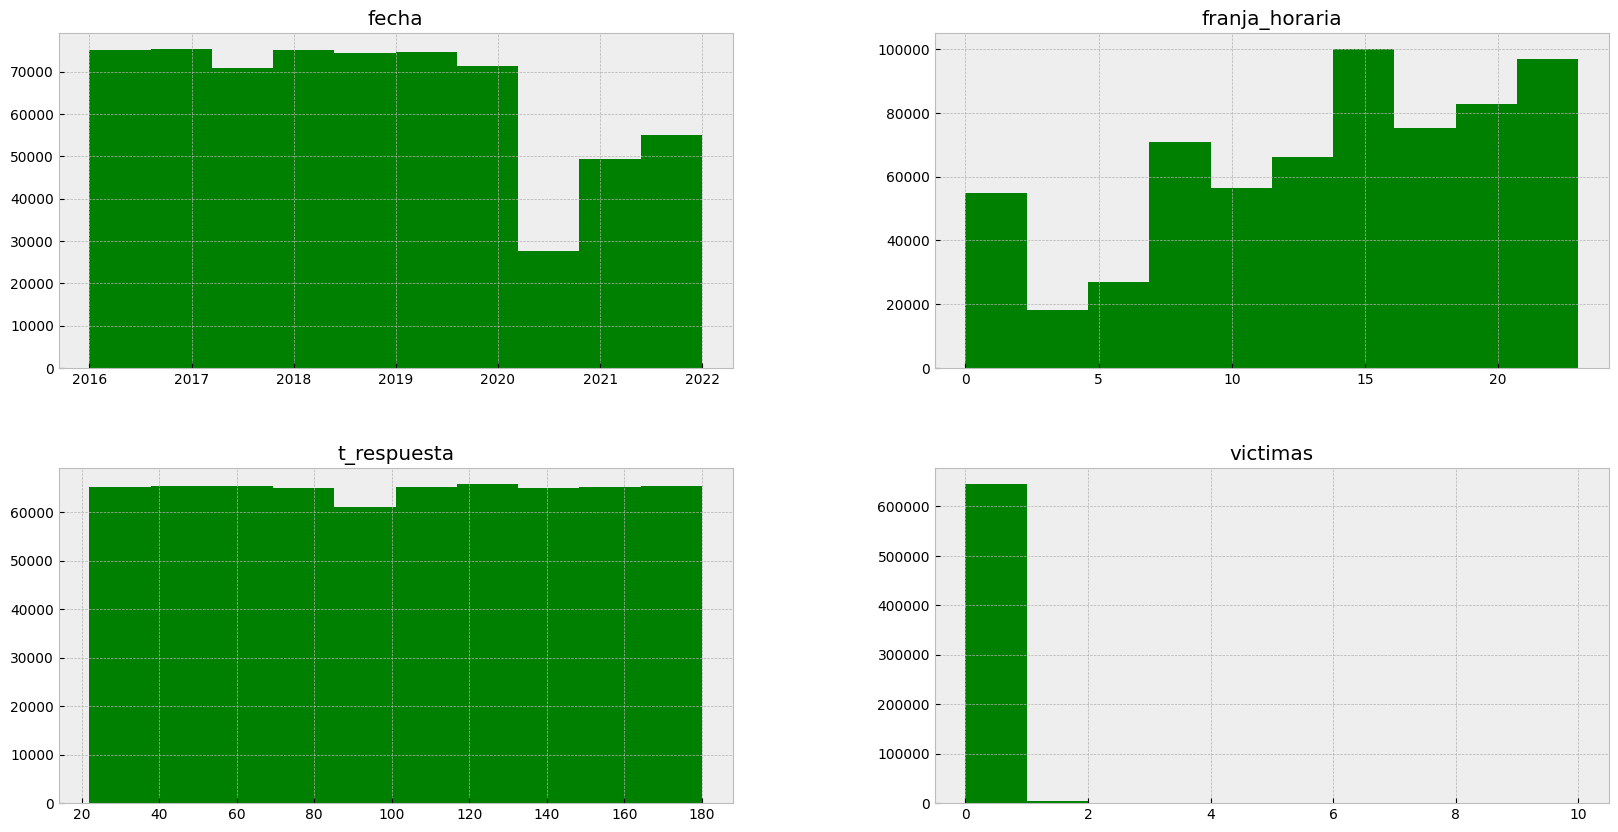

In [51]:
hists = df_delitos.hist(figsize=(20,10), color = 'green')

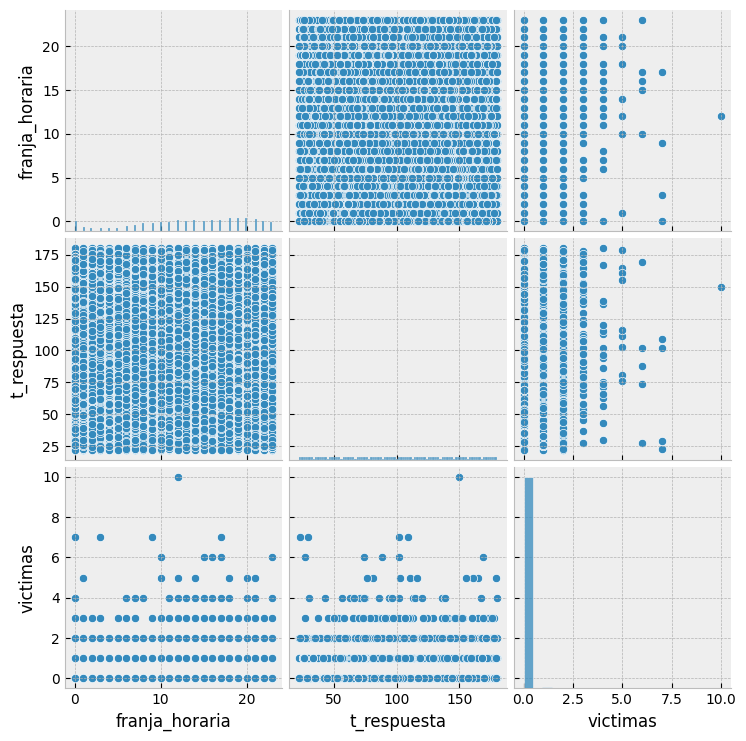

In [52]:
graf=df_delitos[['franja_horaria','tipo','uso_armas','t_respuesta','arresto','barrio','victimas']]
sns.pairplot(graf)

### Análisis Relacional

In [53]:
df_delitos.corr(method = 'spearman')

,franja_horaria,t_respuesta,victimas
franja_horaria,1.000000,-0.000066,-0.003621
t_respuesta,-0.000066,1.000000,0.000889
victimas,-0.003621,0.000889,1.000000


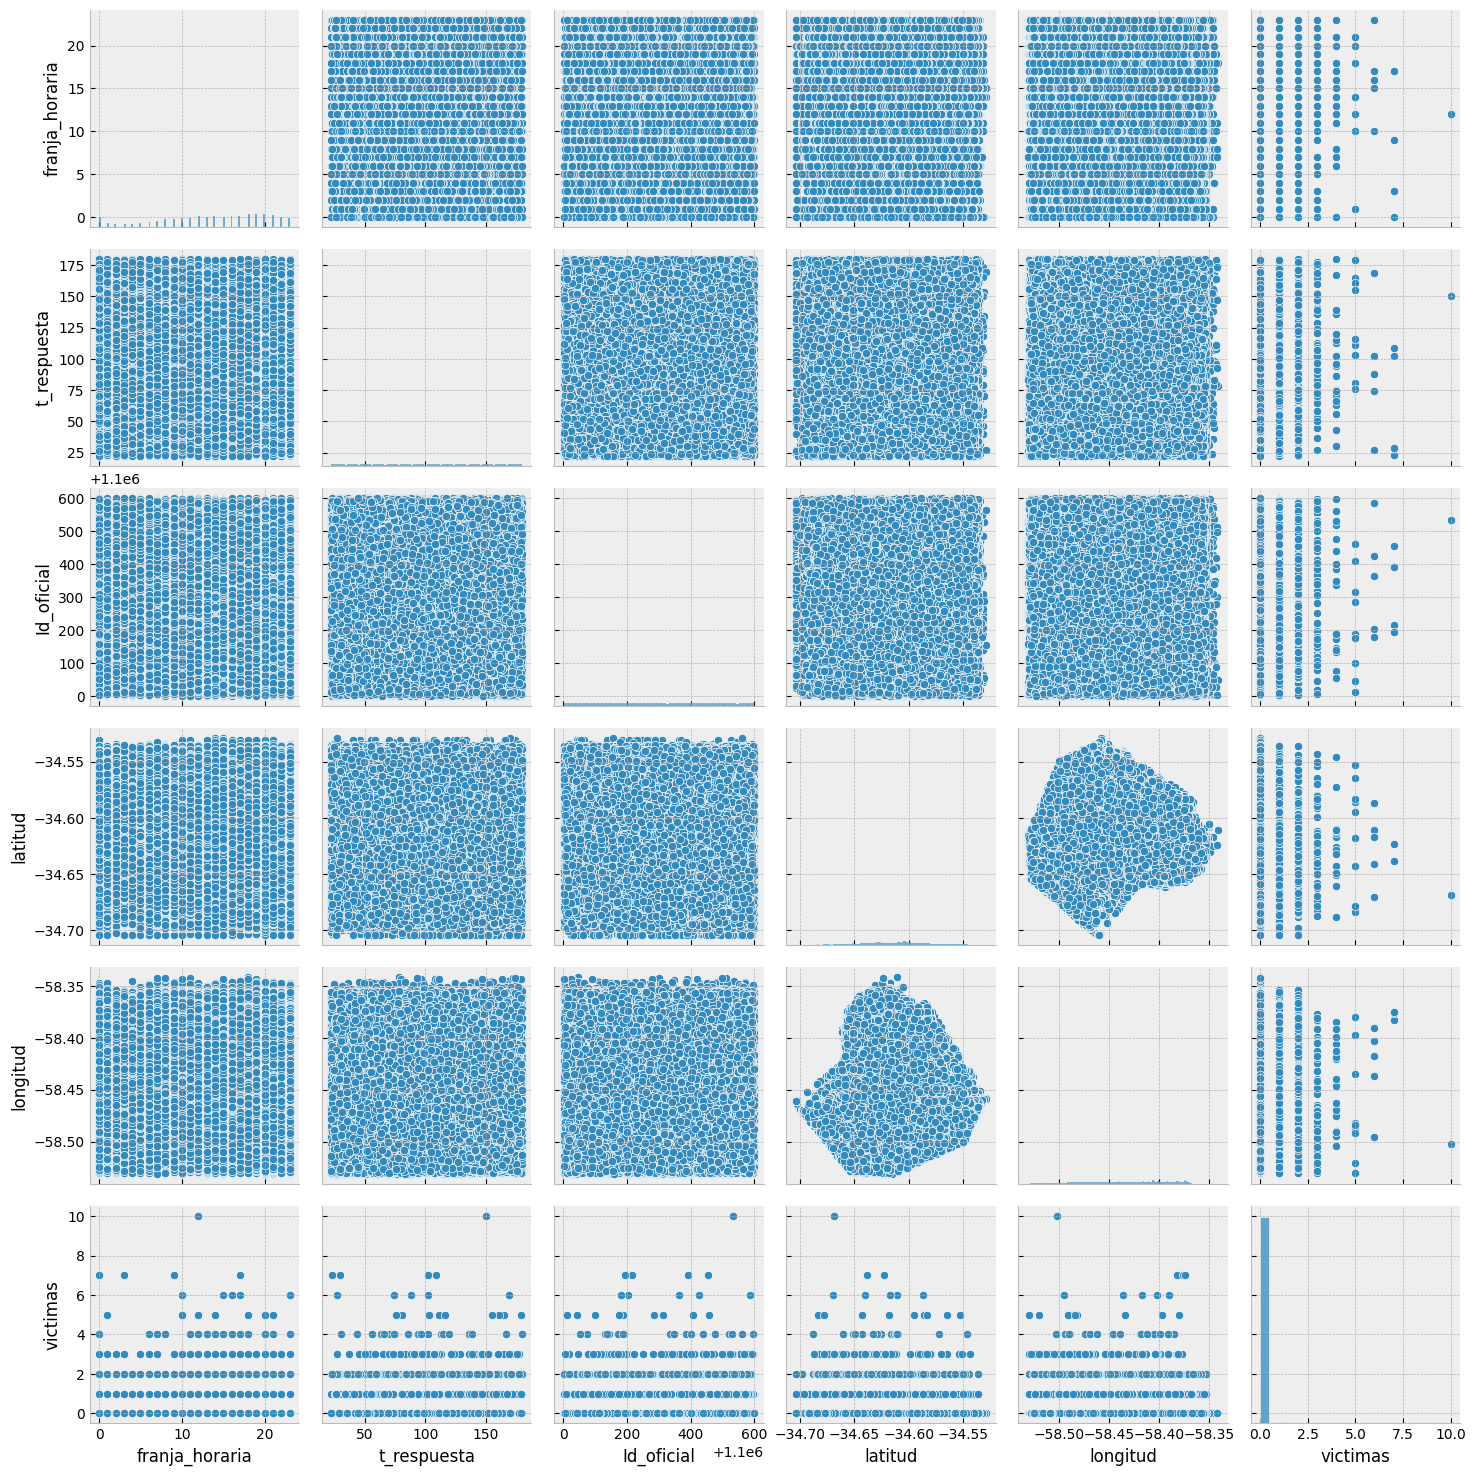

In [54]:
sns.pairplot(df_delitos)

## Preguntas/Hipótesis a resolver mediante el análisis de datos

Sobre la variable tiempo de respuesta. Nos preguntamos:
- El promedio de tiempo de respuesta
- El máximo tiempo respuesta (La demora maxima)
- El mínimo tiempo de respuesta
- En cuantas se tardo mas de 1 hr. en responder y en cuantas menos
Planteamos la siguiente prueba de hipotesis
- La distribución de la variable x:tiempo de respuesta es uniforme. H0: la distribución es uniforme Ha: la distribución no es uniforme
            
Sobre la variable barrios nos preguntamos
- Barrio con mayor delitos
- Barrio con menor delitos
- Promedio de delitos entre todos los barrios
- Que cantidad de barrios se ubican por debajo del promedio      


Sobre la variable modalidad de delito. Nos preguntamos
- Mayor modalidad de robo
- Menor modalidad de robo

Sobre la variable fechas de los delitos. Nos preguntamos:
- En que fecha sucedieron mas delitos
- En que fecha sucediren menos delitos
- Promedio de delitos por día
- Promedio de delitos por año
- Año con más delitos En busqueda de poder propiciar un pronostico, son de interes las siguientes pruebas de hipotesis Para que el proceso sea estacionario es necesario que la media y varianza sean constantes
- La media de los valores es menor que infinito. H0-μ<∞ Ha-μ=∞
- El desvio estandar de los valores es menor a infinito. H0-σ²<∞ Ha-σ²=∞

Para analizar si el ruido de la variable anterior es blanco y poder pronosticar se debe cumplir las siguientes hipotesis (siendo el error ε-sub-t)
- La distribución de los errores es normal. H0-E(ε-sub-t)=0 Ha-E(ε-sub-t)≠0
- La autocorrelación es nula. H0-ρ-sub-t=0 Ha-ρ-sub-t≠0
- La varianza de los errores es constante. H0-S<∞ Ha-S=∞

Sobre la variable id de policia. Nos preguntamos:
- Que policia participo en más delitos
- Que policia participo en menos delitos
- Cantidad promedio de participación en delitos
- Cantidad que participa en más de 1000 delitos


Sobre la variable franja horaria, nos preguntamos:
- Cual es la franja horaria con mayor delitos cometidos
- Cual es la franja horario con menor delitos cometidos
- Mayormente los delitos se cometen en horarios diurnos o nocturnos


Es interesante realizar la siguiente pruebas de hipotesis
- La dsitribución de la variable x:delitos por franja horaria es normal. H0- x se distribuye de forma normal Ha-x no se distribuye de forma normal

## StoryTelling e Insight

  A lo largo de los años las situaciones delictivas han ido aumentando en toda la Argentina, sobre todo en las ciudades mas importantes y pobladas del país, en particular la Ciudad Autonoma de Buenos Aires, la cual se tomará como zona geografica de estudio. El objetivo es realizar diferentes tipos de análisis cruzando variables que nos permitan obtener información de forma clara y detallada sobre el comportamien delictivo antes, durante y en la post pandemia, como asi tambien el desarrollo geofrafíco del mismo; para poder tener conocimiento y anticipar este tipo de situaciones.
  
  Al concer el comportamiento de los mismos puede se pueden generar información de salida que ayude a la toma de decisiones como puede ser: ventajas para combatir el delito por parte de las fuerzas policiales, por otro lado esta información utilizarse como una ventaja competitiva para la industria y comercios que brinden bienes y servicios a la sociedad. O bien, puede ser utilizada por la pobalción en general para coordinar reuniones, movimientos, u otras actividades con los cuidados de seguridad necesarios.
  
  Se buscará comprender el comportamiento de la criminalidad en la región estudiada (CABA) partiendo de la hipótesis que a incrementado la tasa de delitos a lo largo del tiempo. Además, se puede hacer un análisis del tipo geográfico, tomando en cuenta las variables de zonas y barrios más peligrosos.

### 1. Evolución de la cantidad de delitos.

Se buscará conocer como a evolucionado la actividad delictiva a lo largo del tiempo, en particular desde enero de 2016 hasta diciembre de 2021.
Se espera que la cantidad de delitos haya disminuido durante el confinamiento obligatório dictado por el gobierno nacional y una vez terminado que los valores de los mismo vuelvan a los que eran antes del dictamen nacional o bien que aumente, debido a la influciencia que este suceso tubo sobre la econimía del país.

Text(0, 0.5, 'Cantidad de delítos')

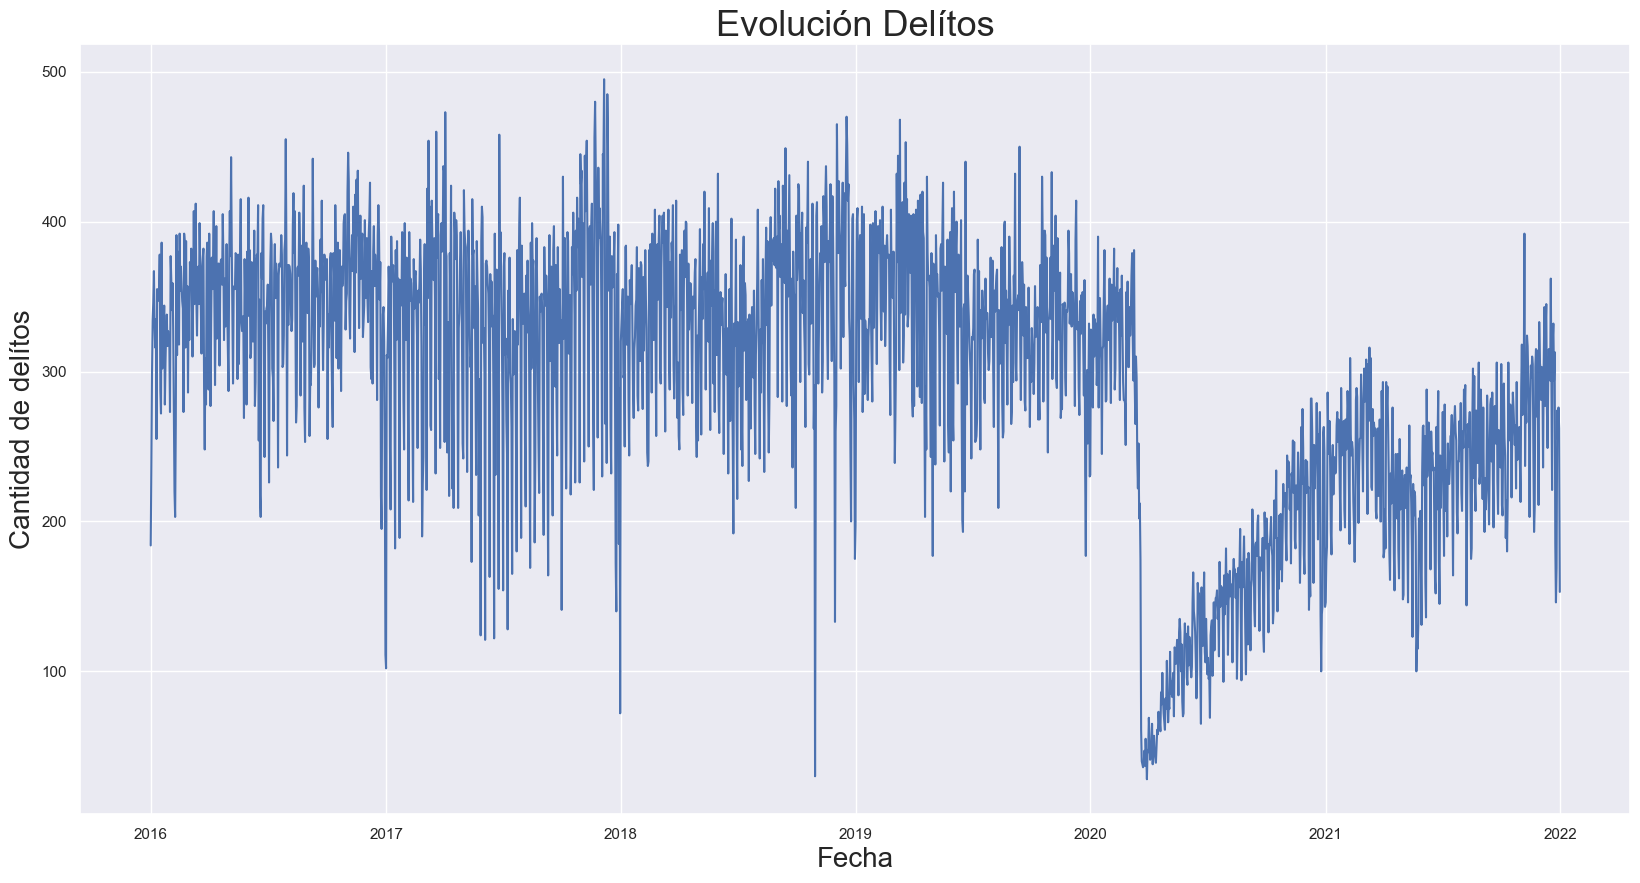

In [56]:
sns.set(rc = {'figure.figsize':(20,10)})
fechas_de_delitos = df_delitos.fecha.groupby(df_delitos.fecha.values).count()

p=sns.lineplot(data=fechas_de_delitos, x=fechas_de_delitos.index, y=fechas_de_delitos.values)
plt.title("Evolución Delítos", fontsize = 26 )
plt.xlabel("Fecha",fontsize = 20)
plt.ylabel("Cantidad de delítos",fontsize = 20)

Se puede notar que desde enero de 2016 hasta diciembre de 2020 la cantidad de delitos diarios es bastante regular, a los principios de cada año los mismo disminuyen para comenzar a aumentar en los meses posteriores hasta Junio/Julio para disminuir levemente durante un periodo de pocos meses y nuevamente volver a aumentar.

Como se esperaba, durante el comienzo del confinamiento, Marzo/Abril de 2020, la cantidad de delítos se ve disminuida notablemente y a medida de que avanza el tiempo la misma va aumentado a la cantidad natural de los años anteriores, aunque sin poder alcanzar, del todo, los valores comunes.
Y dado que se espera que aumente la tasa de delitos, es de suma importancia conocer los lugares y los horarios en que mas se producen los mismos.

### 2.Barrios y horarios.

#### 2.1.Barrios

Con ánimos de concer cuales son los barrios mas seguros, se buscará comparar entre ellos la cantidad de delítos que sucede en cada uno de los mismos.

<BarContainer object of 52 artists>

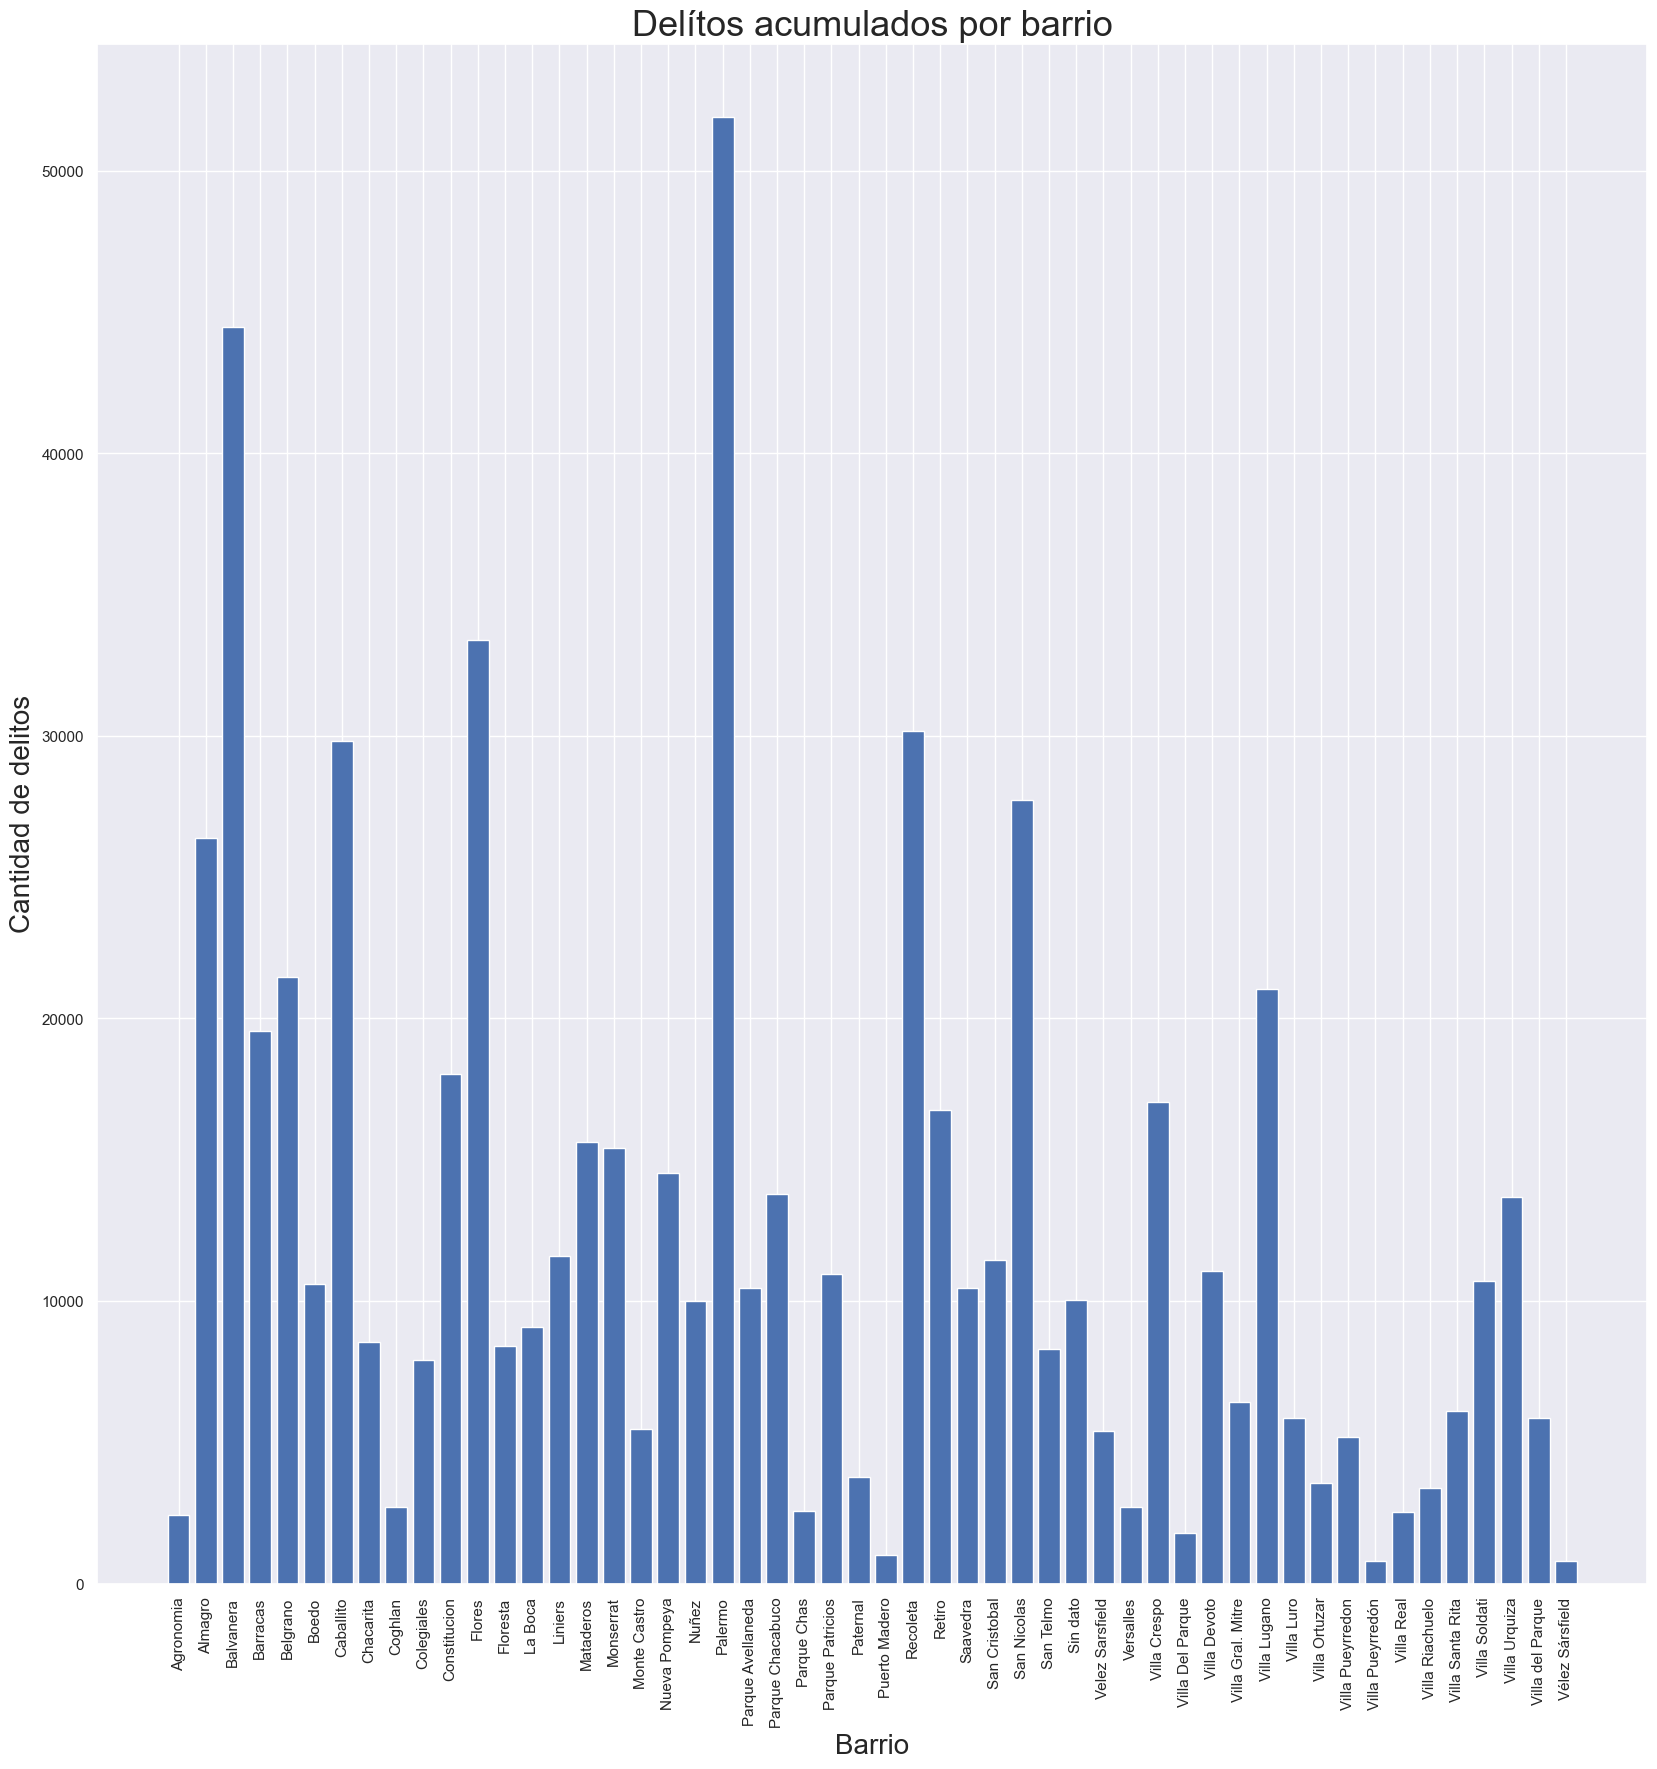

In [57]:
cuenta_barrio = df_delitos.barrio.groupby(df_delitos.barrio).count()
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(rotation = 90)
ax.set_title('Delítos acumulados por barrio',fontsize = 26)
ax.set_ylabel('Cantidad de delitos',fontsize = 20)
ax.set_xlabel('Barrio',fontsize = 20)
ax.bar(cuenta_barrio.index, cuenta_barrio)

Del gráfico se puede observar que el barrio con mayor cantidad de delítos es Palermo, seguido de Balvarena y Flores, todos con mas de 30000 trasgresiones concretados en los años en cuestión, siendo Palermo el lugar con mas robos dado a que es una mas turísticos visitados por extranjeros, Balvarena se puede considerar un barrio donde hay muchos inmigrates. Por el otro lado los barrios con menor tasa de delítos son Puerto Madero, Villa Pueyrredon y Velez Sarfied, los cuales son barrios resindeciales.

#### 2.2 Franja Horaria

En busqueda de conocer cuales son los horarios en donde mas delítos se prodecen se contará la cantidad de los mismos en cada hora del día.

Text(0.5, 0, 'Franja Horaria')

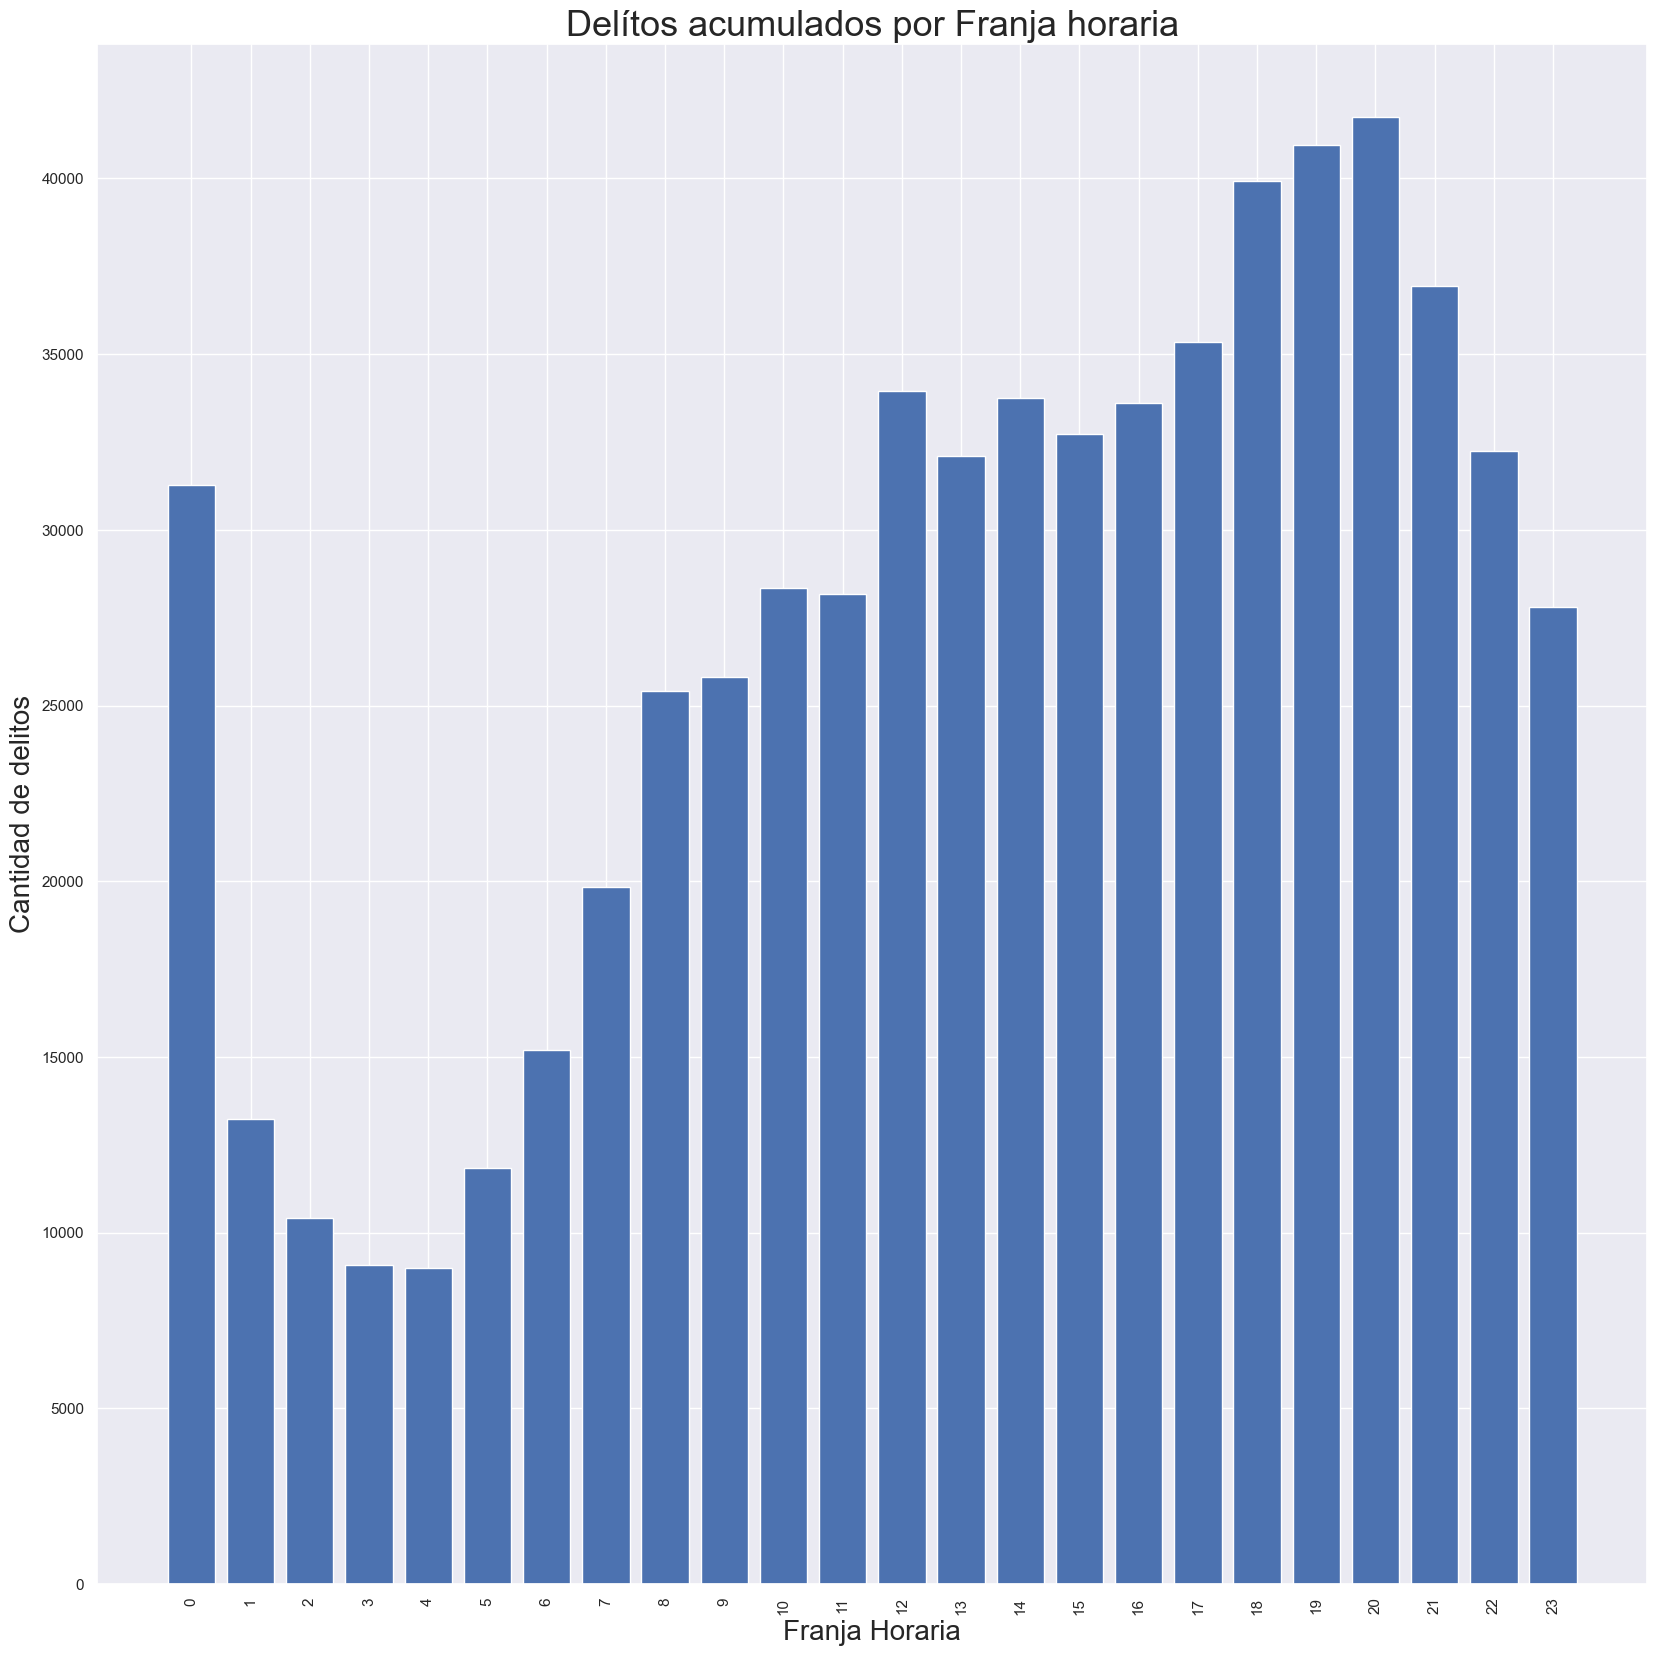

In [58]:
df_delitos['franja_horaria_num']=pd.to_numeric(df_delitos.franja_horaria, errors='coerce')
cuenta_franja = df_delitos.franja_horaria_num.groupby(df_delitos.franja_horaria_num).count().sort_index()
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(cuenta_franja.index.astype(int),rotation = 90)
ax.bar(cuenta_franja.index.astype(int), cuenta_franja)
ax.set_title('Delítos acumulados por Franja horaria',fontsize = 26)
ax.set_ylabel('Cantidad de delitos',fontsize = 20)
ax.set_xlabel('Franja Horaria',fontsize = 20)

Como bien se espera la cantidad de transgresiones acumuladas en horas de la madrugada es baja, dado que el moviento de personas en esos horarios tambien lo es. En la franja horaría de las 7 hasta las 11 am la cantidad de delítos ocurridos no es muy alto contemplando que en esas horas del día el moviento es alto, ya sea por asistencia al trabajo, apertura de locales, entre otros sucesos destacables.

El rango horario mas comprometido es el de las 17 a las 21 horas, lo cual es entendible ya que es el horario en donde los negocios cierran o bien la gente vuelve a sus casas, que en muchos casos es con dinero en mano y por lo tanto se intuye que puede ser un buen factor causanete de los delítos. Lo cual nos lleva a averiguar cuales son los tipos de delitos registrados.

### 3. Tipos de Delítos

En busqueda de concer el comportamiento, es importante concer como es su clasificacíon y tambien en medida se dan.

Text(0.5, 1.0, 'Clasificacón de Delitos')

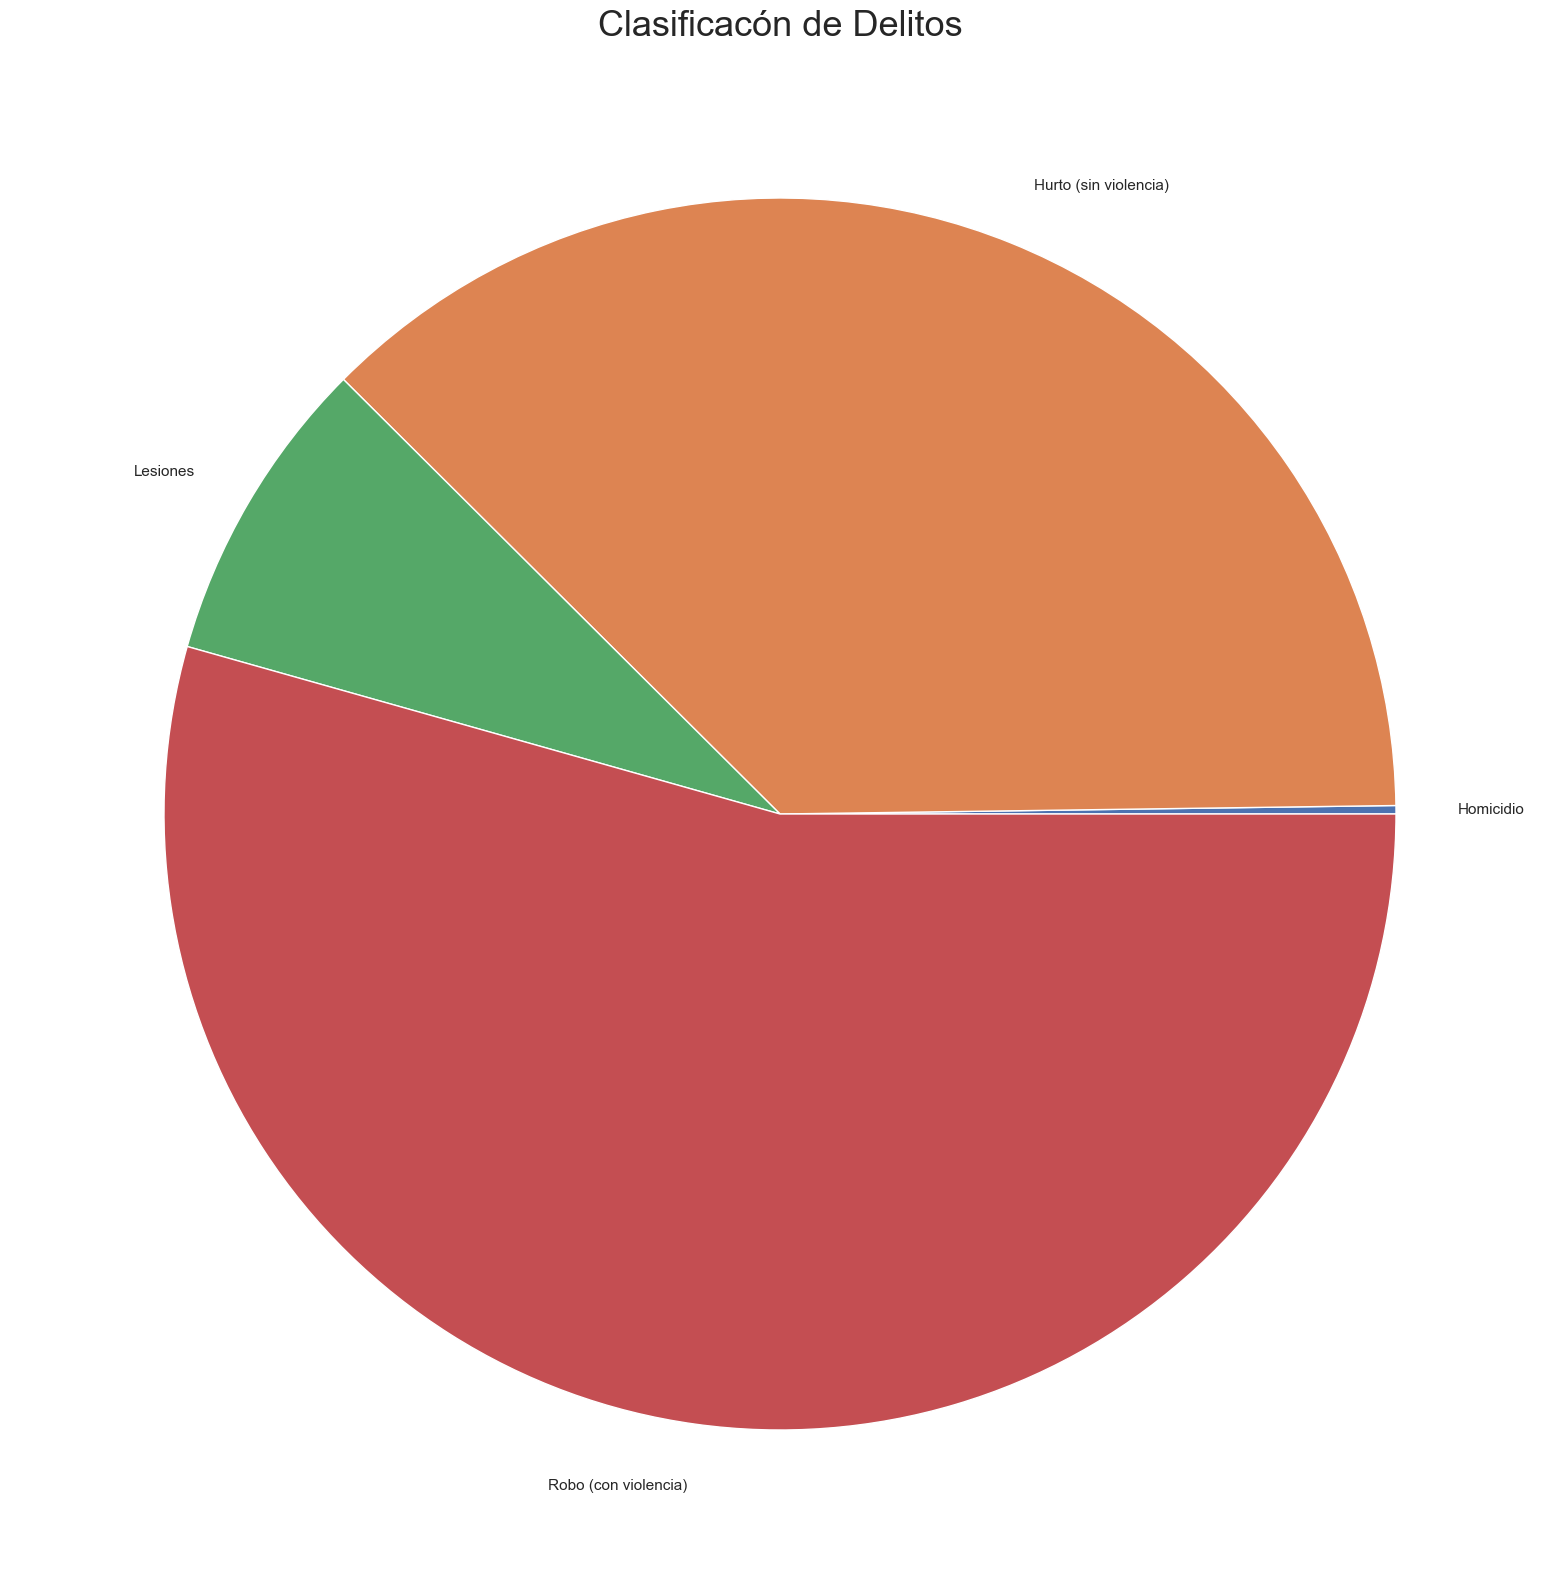

In [59]:
cuentita_b= df_delitos.tipo.groupby(df_delitos.tipo).count()
fig,ax = plt.subplots(figsize =(20, 20))
ax.pie(cuentita_b, labels = cuentita_b.index)
ax.set_title('Clasificacón de Delitos',fontsize = 26)

Los delítos se calsifican en 4 categorías, las cuales son robo o hurto que puede ser sin o con violencia, homicidio o lesiones. Mas del 50% de las trangresiones son robos con violencia, continuados por robos sin violencia y el la menor cantidad de los delitos son homicidios

Los robos como las lesiones pueden ser ocacionadas por ataques fisícos, pero los homicidio muy probablemente sean realizados con armas, por lo que es necesario conocer la proporción de delítos que se realicen sin arma o bien con armas, tanto las denominadas "blancas" como tambien las que no.

Text(0.5, 1.0, 'Uso de Armas')

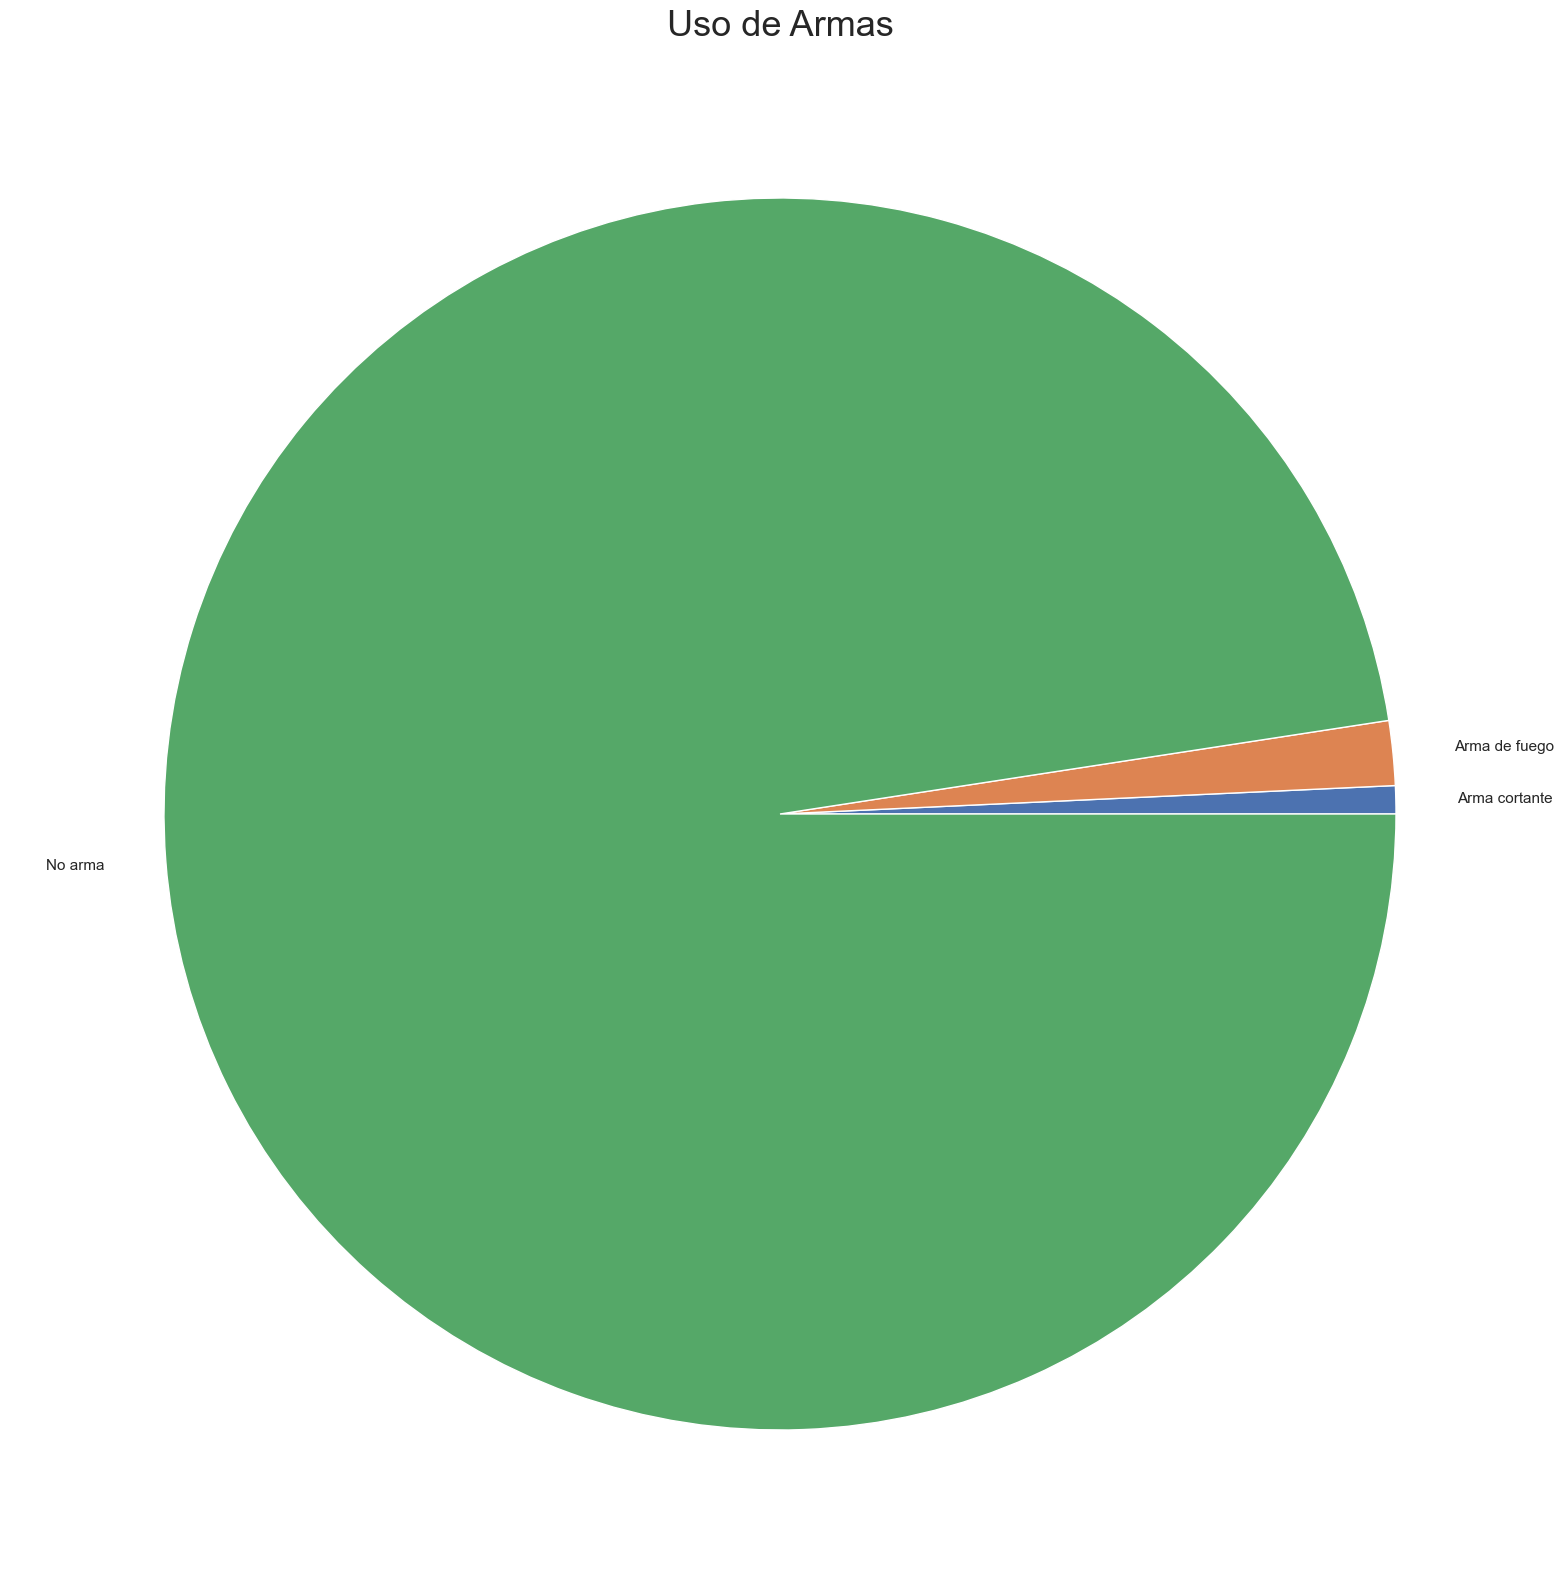

In [60]:
c_armas= df_delitos.uso_armas.groupby(df_delitos.uso_armas).count()
fig,ax = plt.subplots(figsize =(20, 20))
ax.pie(c_armas, labels = c_armas.index)
ax.set_title('Uso de Armas',fontsize = 26)

En la mayoria de los casos no se utiliza ningun tipo de arma,  y en los que sí, se puede notar que el porccentaje de los mismo es bajo, lo cual se puede suponer que es coincidente con el porcentaje de delítos caracterizados como homicidios.

Con respecto a lo ultimo mencionado, conocer el número de victimas acumladas puede dar una buena noción de la gravedada de los homicidios.

Text(0.5, 0, 'Cantidad')

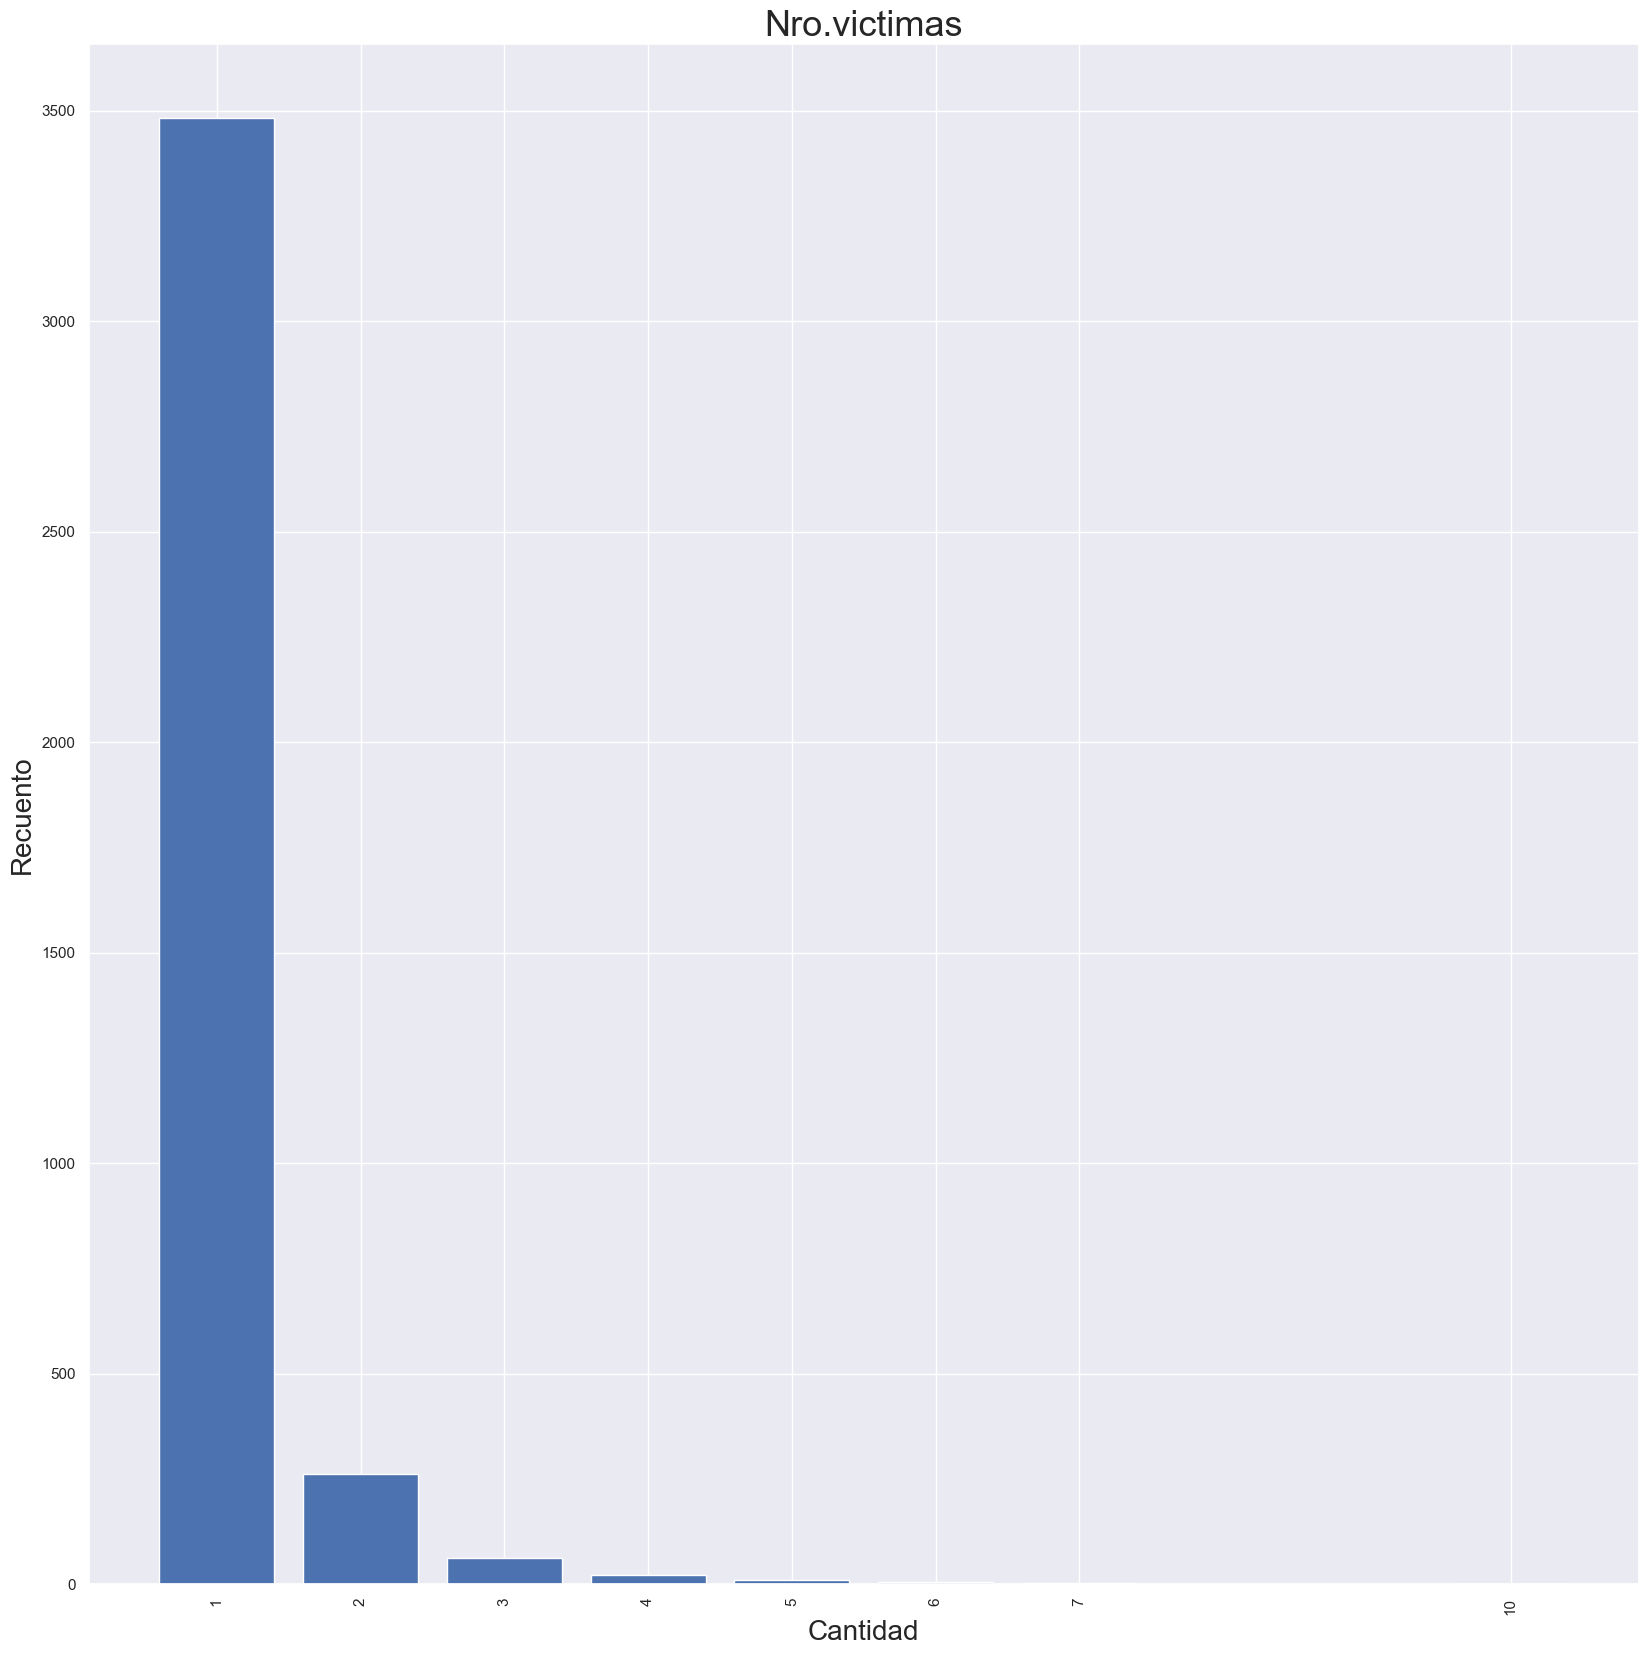

In [61]:
cuenta = df_delitos.victimas.groupby(df_delitos.victimas).count()
data = {"Cantidad_de_victimas":cuenta.index,
        "recuento":cuenta}
cuenta_victimas = pd.DataFrame(data)
cuenta_victimas.drop([0], axis=0, inplace=True)
cuenta_victimas
fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(cuenta_victimas.Cantidad_de_victimas,rotation = 90)
ax.bar(cuenta_victimas.Cantidad_de_victimas, cuenta_victimas.recuento)
ax.set_title('Nro.victimas',fontsize = 26)
ax.set_ylabel('Recuento',fontsize = 20)
ax.set_xlabel('Cantidad',fontsize = 20)

Si bien se trata de homicidios, el nro. de los mismos es bajo siendo en la mayoria de los casos que ocurren 1 o 2 personas y ya en menor medida 3,4 o 5.

Ahora que se conocer como se comporta la actividad delictiva, habrá que conocer la contracara de la situación, es decir a quienes deben proteger a los ciudadanos, la policía.

### 4. Actividad policial

Ya conocidos como se puede caracterizar los delítos, es muy importante conocer al actuar de las fuerzas policiales para contrarestarlos
En primer lugar buscaremos conocer como es el tiempo de respuesta de los efectivos.

Text(0, 0.5, 'Frecuencia absoluta')

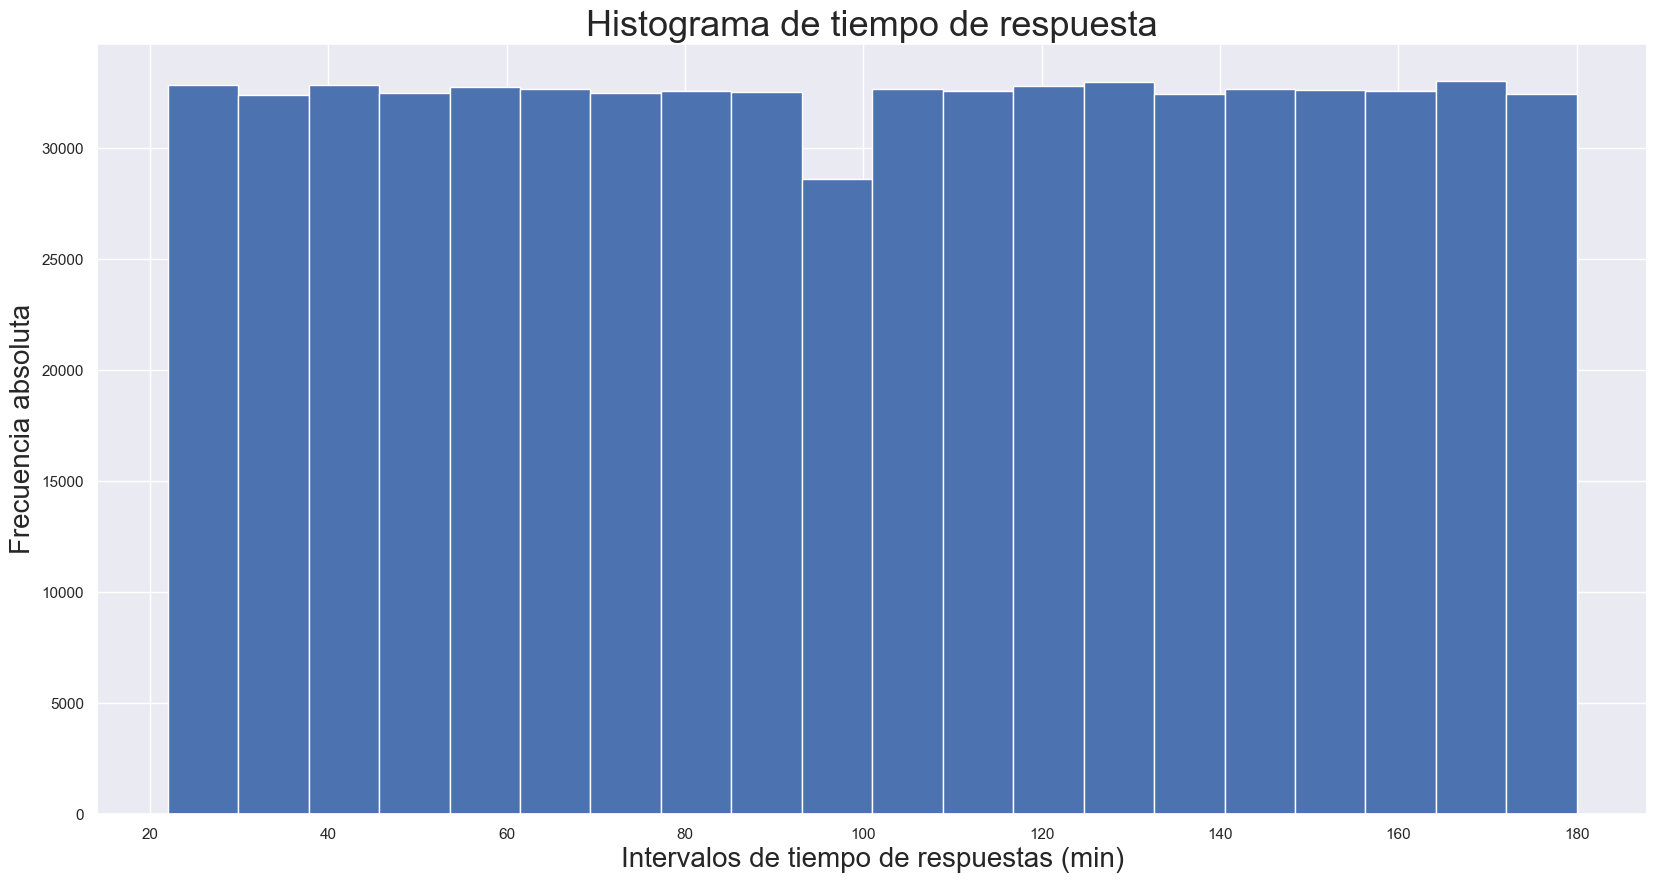

In [62]:
fig, ax = plt.subplots()
ax.hist(df_delitos.t_respuesta, bins=20)
ax.set_title('Histograma de tiempo de respuesta', fontsize = 26)
ax.set_xlabel('Intervalos de tiempo de respuestas (min)',fontsize = 20)
ax.set_ylabel('Frecuencia absoluta',fontsize = 20)

Se puede notar que los tiempos de respuesta pueden llegar a tener una distribución uniforme entre aproximadamente 23 minutos y 180, lo cual es preocupante, ya que es muy elevada la cantidad de hechos en los que el tiempo de respuesta supera la hora, dado que superado ese tiempo es muy dificíl poder arrestar a los malechores. Siendo a continución muy importante concer en cuantos casos se realizan arrestos.

Text(0.5, 1.0, 'Arrestos')

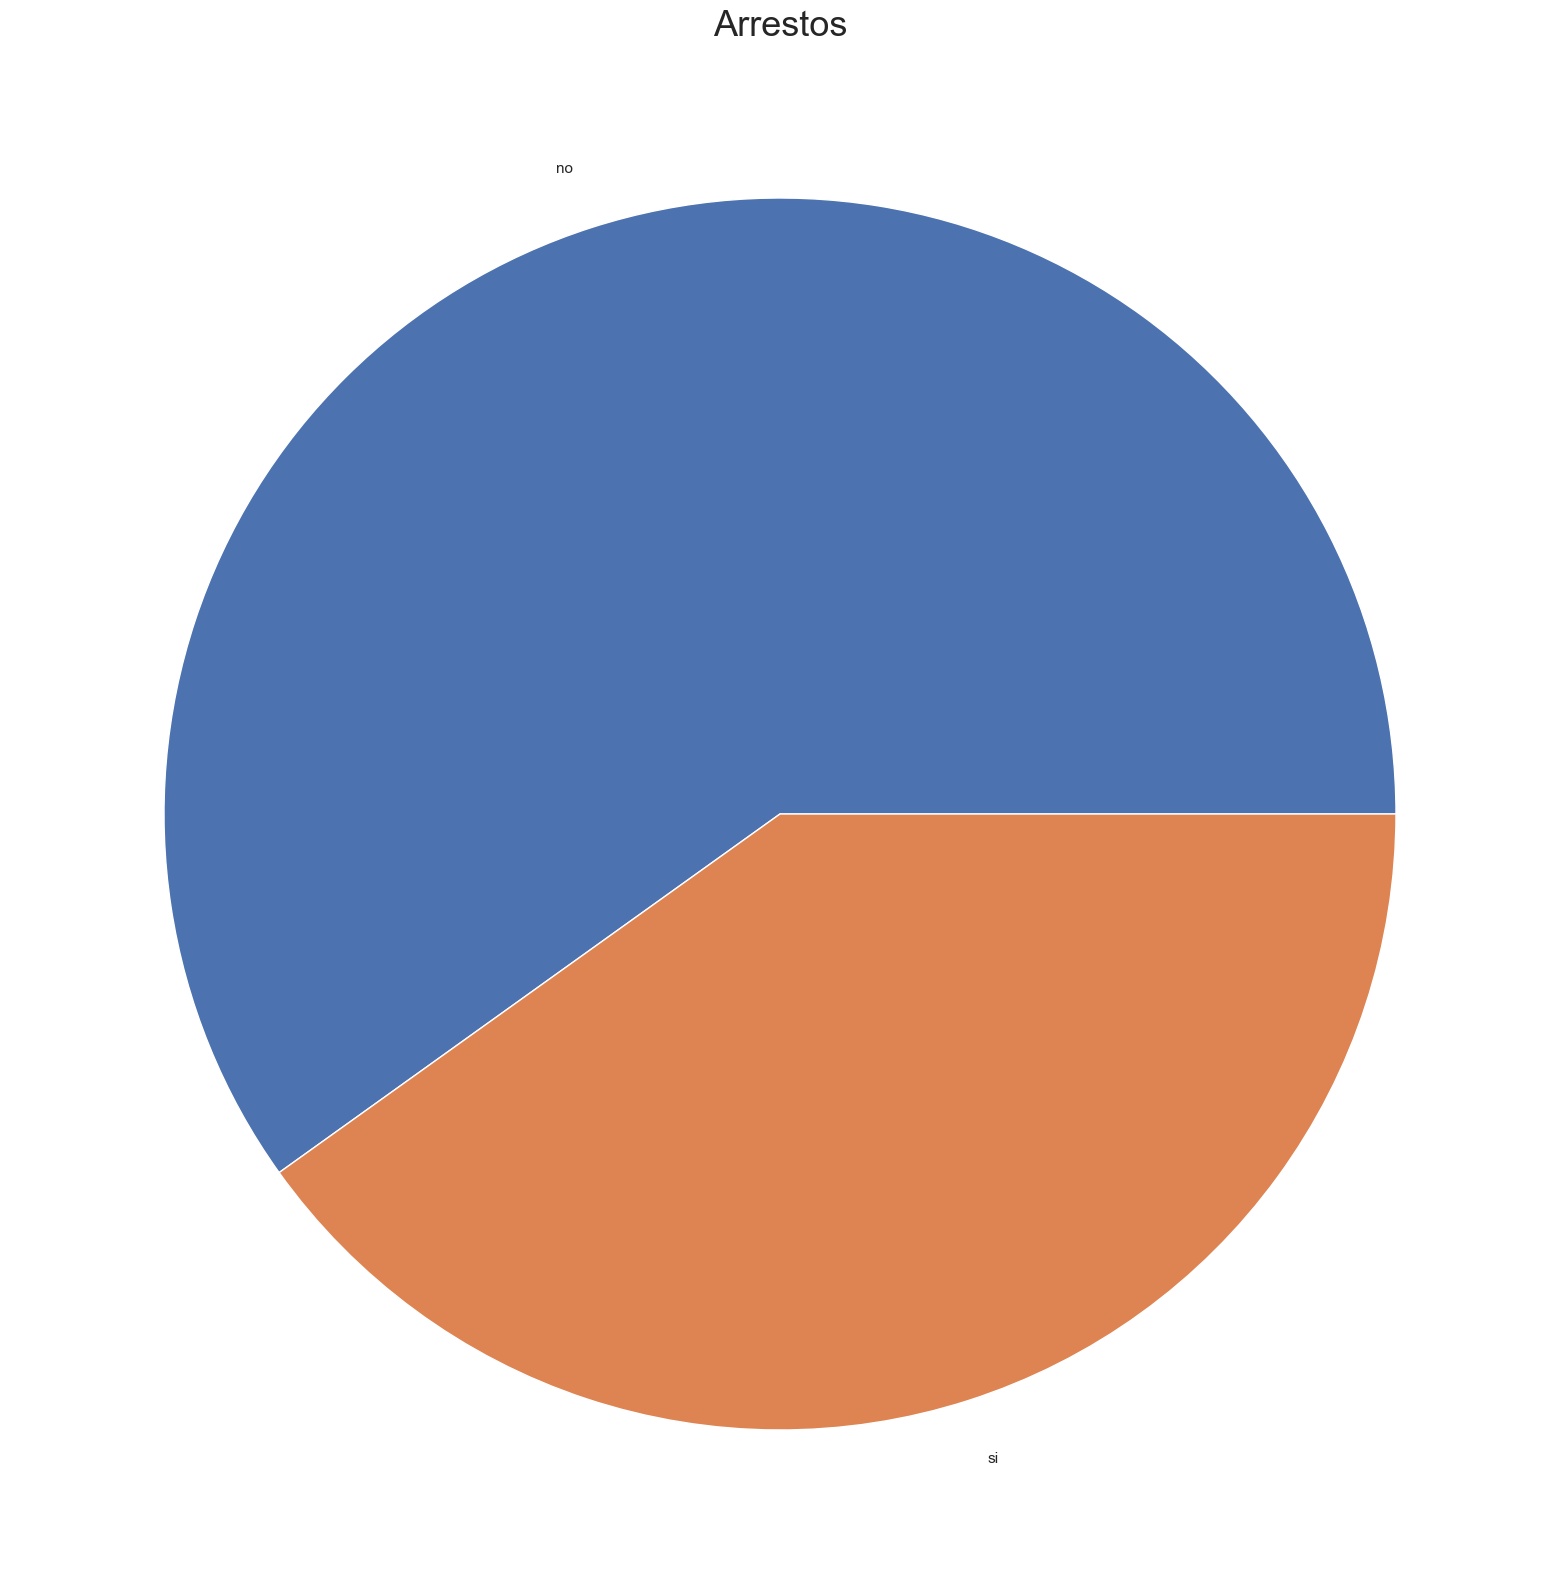

In [63]:
c_arrestos= df_delitos.arresto.groupby(df_delitos.arresto).count()
fig,ax = plt.subplots(figsize =(20, 20))
ax.pie(c_arrestos, labels = c_arrestos.index)
ax.set_title('Arrestos',fontsize = 26)

En mas del 50% de los casos no se arrestan a quellas personas que trasngreden la ley.

Por este porcentaje de no arrestados y el alto tiempo de respuesta se puede intuir en un primer momento que el actuar de la policia no esta al nivel requerido por lo delítos que suceden.

Pudiendose así concluir que la actividad delictiva es alta sobre todo en los barrios de Palermo y Balvarena, mas que nada en los horarios de la tarde noche, es decir entre las 17 y las 21. En la mayoría de los casos se registran robos o hurtos, que por desgracia son con violencia y sumado a esto el actuar policial no acompaña lo suficiente como para poder brindar seguridad a los ciudadanos, como asi tambien poder aarestar a quienes comenten los delítos o aunque sea poder recuperar las pertenencias robada o hacer justicia por quien a sido lesionado o por la familía de quien/es hayan fallecido.

### Análisis Univariado

C:\Users\User\miniconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


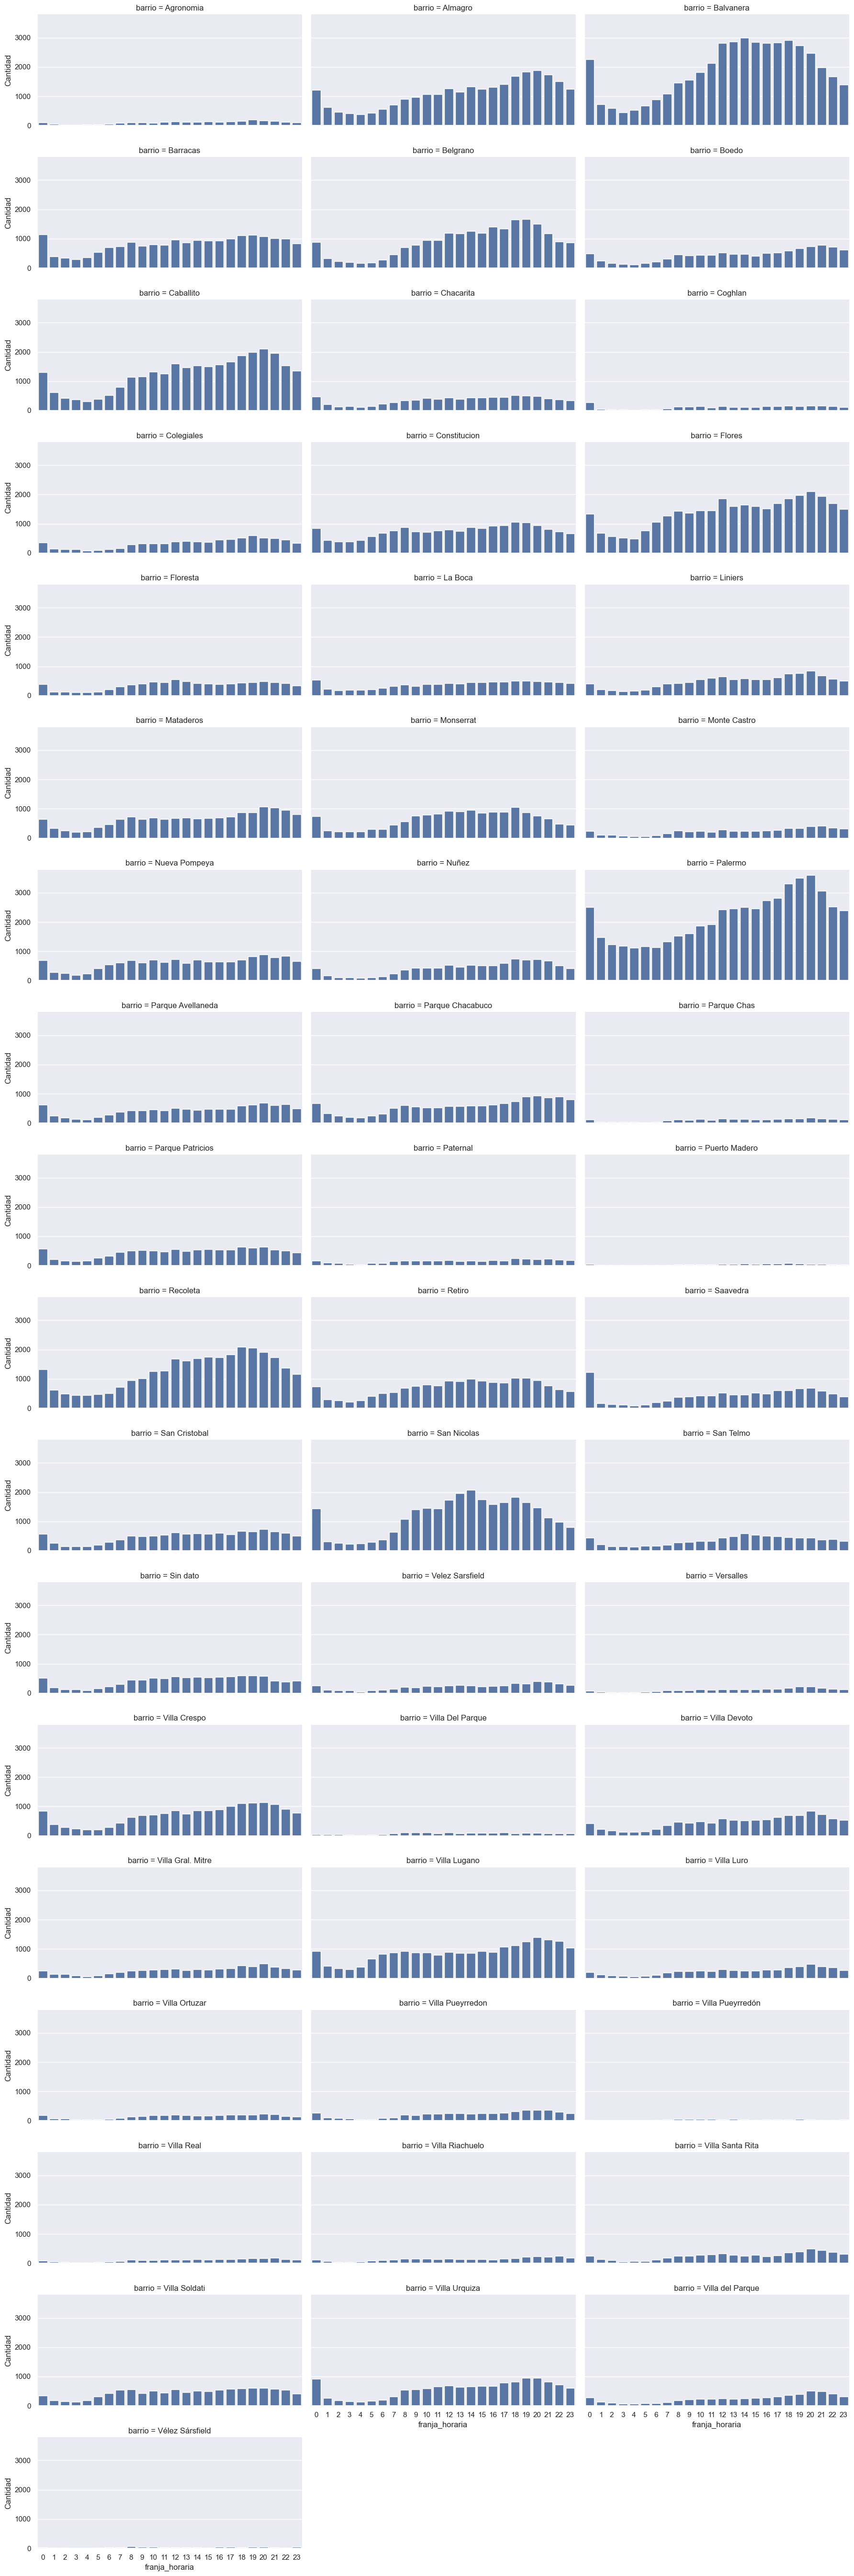

In [65]:
df1 = pd.DataFrame({'Cantidad': df_delitos.groupby(['barrio', 'franja_horaria']).size()})
df1 = df1.reset_index()
chart = sns.FacetGrid(df1, col='barrio', margin_titles=True, col_wrap=3, aspect=2, row_order=df_delitos['barrio'].unique)
chart.map(sns.barplot, 'franja_horaria', 'Cantidad',)

C:\Users\User\miniconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


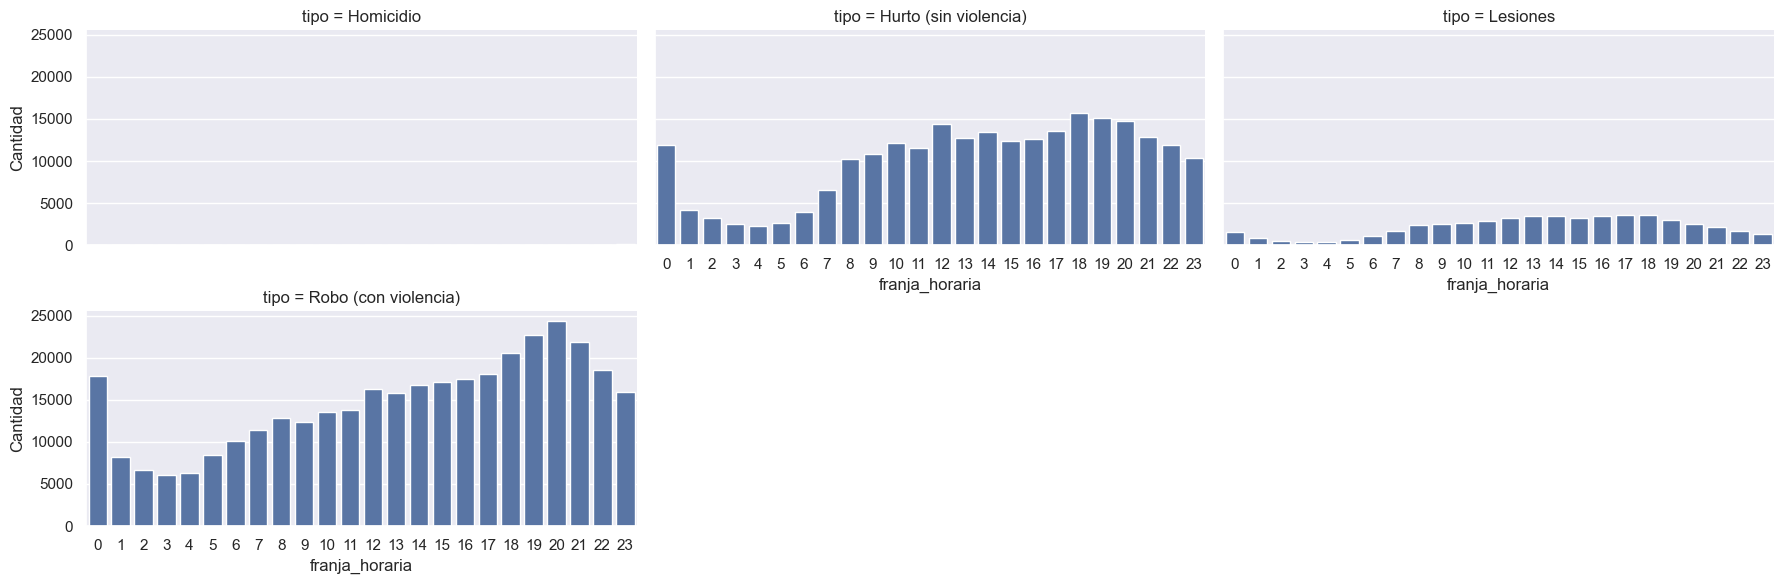

In [66]:
df2= pd.DataFrame({'Cantidad': df_delitos.groupby(['tipo', 'franja_horaria']).size()})
df2 = df2.reset_index()
chart2 = sns.FacetGrid(df2, col='tipo', margin_titles=True, col_wrap=3, aspect=2, row_order=df_delitos['tipo'].unique)
chart2.map(sns.barplot, 'franja_horaria', 'Cantidad',)

C:\Users\User\miniconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


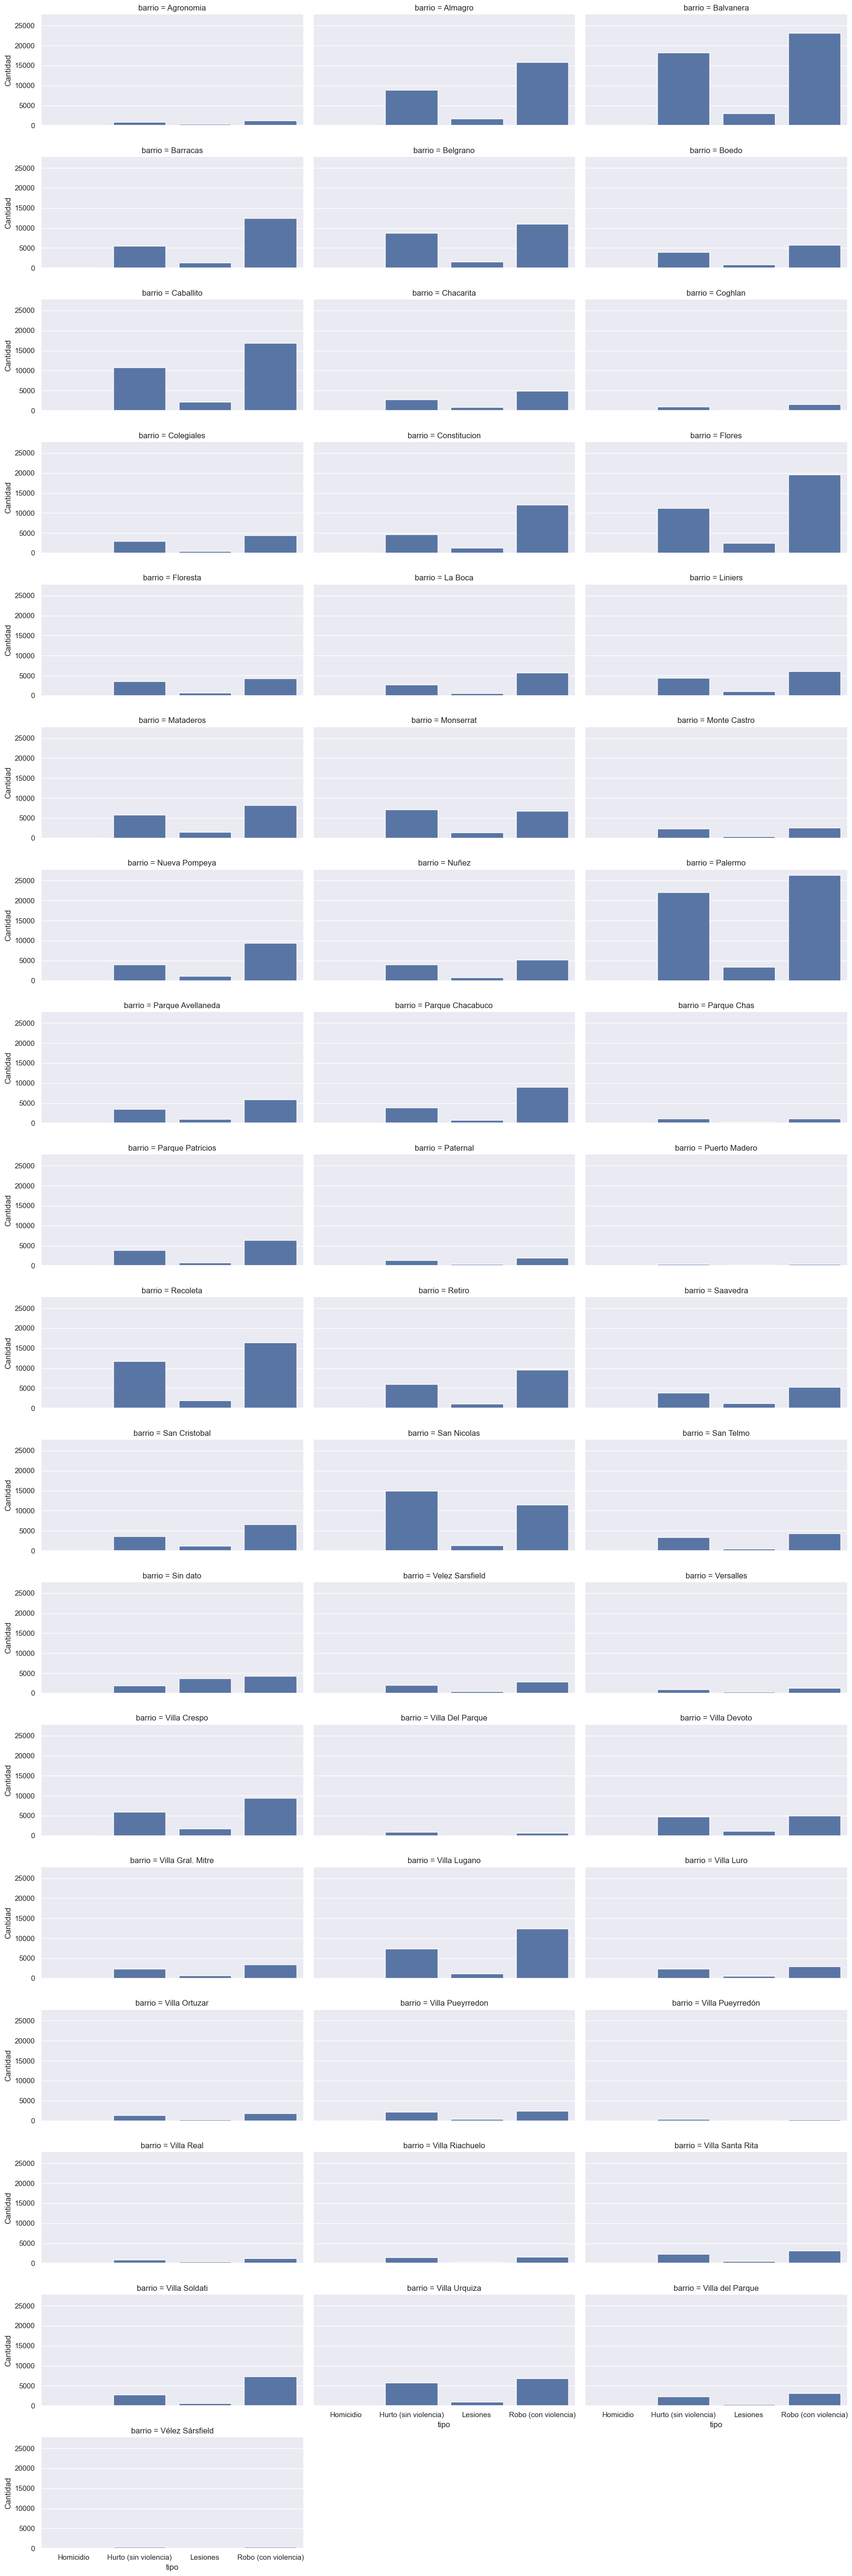

In [67]:
df3 = pd.DataFrame({'Cantidad': df_delitos.groupby(['barrio', 'tipo']).size()})
df3 = df3.reset_index()
chart3 = sns.FacetGrid(df3, col='barrio', margin_titles=True, col_wrap=3, aspect=2, row_order=df_delitos['barrio'].unique)
chart3.map(sns.barplot, 'tipo', 'Cantidad',)

C:\Users\User\miniconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


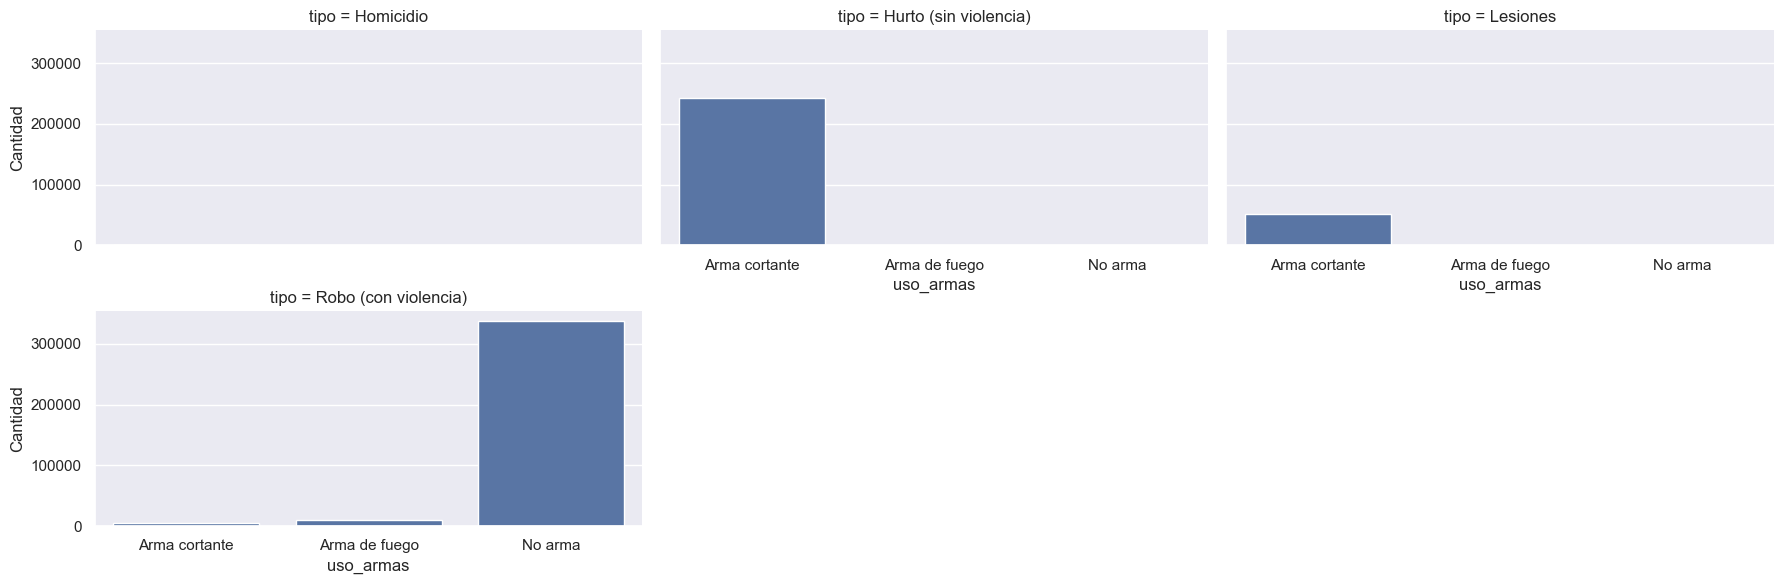

In [68]:
df4= pd.DataFrame({'Cantidad': df_delitos.groupby(['tipo', 'uso_armas']).size()})
df4 = df4.reset_index()
chart4 = sns.FacetGrid(df4, col='tipo', margin_titles=True, col_wrap=3, aspect=2, row_order=df_delitos['tipo'].unique)
chart4.map(sns.barplot, 'uso_armas', 'Cantidad',)

In [69]:
df5= pd.DataFrame({'Cantidad': df_delitos.groupby(['fecha']).size()})
stats.describe(df5)

DescribeResult(nobs=2192, minmax=(array([28], dtype=int64), array([495], dtype=int64)), mean=array([295.91970803]), variance=array([7791.71696422]), skewness=array([-0.73461656]), kurtosis=array([0.0233892]))

In [70]:
stats.variation(df5)

array([0.2982247])

In [71]:
stats.iqr(df5)

120.0

In [72]:
stats.sem(df5)

array([1.88536877])

In [73]:
stats.skew(df5)

array([-0.73461656])

In [74]:
stats.kurtosis(df5)

array([0.0233892])

In [75]:
RCV = df_delitos.loc[(df_delitos['tipo']=='Robo (con violencia)')]
df6=RCV['t_respuesta']
print(stats.describe(df6))
print(stats.variation(df6))
print(stats.iqr(df6))
print(stats.sem(df6))
print(stats.skew(df6))
### datos sobre el tiempo de respuesta cuando el tipo de delito es robo con violencia

DescribeResult(nobs=352758, minmax=(22, 180), mean=101.08152047579361, variance=2104.328018198584, skewness=-0.0033182931610373934, kurtosis=-1.1993027360353552)
0.45382073753190877
80.0
0.07723573486032924
-0.0033182931610373934


In [76]:
RSV = df_delitos.loc[(df_delitos['tipo']=='Hurto (sin violencia)')]
df7=RSV['t_respuesta']
print(stats.describe(df7))
print(stats.variation(df7))
print(stats.iqr(df7))
print(stats.sem(df7))
print(stats.skew(df7))
### datos sobre el tiempo de respuesta cuando el tipo de delito es hurto sin violencia

DescribeResult(nobs=242060, minmax=(22, 180), mean=100.99179955382962, variance=2110.031400287179, skewness=0.002206075473132192, kurtosis=-1.2012770193565472)
0.45483874355862786
80.0
0.09336475129192107
0.002206075473132192


In [77]:
LS = df_delitos.loc[(df_delitos['tipo']=='Lesiones')]
df8=LS['t_respuesta']
print(stats.describe(df8))
print(stats.variation(df8))
print(stats.iqr(df8))
print(stats.sem(df8))
print(stats.skew(df8))
### datos sobre el tiempo de respuesta cuando el tipo de delito es lesion

DescribeResult(nobs=52414, minmax=(22, 180), mean=100.66297172511162, variance=2114.041581201688, skewness=0.0019910746190756647, kurtosis=-1.2039202956958845)
0.45675453953336514
80.0
0.20083209118839182
0.0019910746190756647


In [78]:
ARR = df_delitos.loc[(df_delitos['arresto']=='si')]
df9=ARR['t_respuesta']
df9_1 = ARR['franja_horaria']
print(stats.describe(df9))
print(stats.variation(df9))
print(stats.iqr(df9))
print(stats.sem(df9))
print(stats.skew(df9))
print("Franja horaria")
print(stats.describe(df9_1))


DescribeResult(nobs=260181, minmax=(22, 180), mean=100.95427798340386, variance=2107.4657702009786, skewness=0.0015586741772202453, kurtosis=-1.2012675149348435)
0.4547311476623713
80.0
0.08999999295791446
0.0015586741772202453
Franja horaria
DescribeResult(nobs=260181, minmax=(0, 23), mean=13.478566843851011, variance=41.345321423647995, skewness=-0.4874444249551106, kurtosis=-0.6797227391614538)


In [79]:
NA = df_delitos.loc[(df_delitos['arresto']=='no')]
df10=NA['t_respuesta']
df10_1 = ARR['franja_horaria']
print(stats.describe(df10))
print(stats.variation(df10))
print(stats.iqr(df10))
print(stats.sem(df10))
print(stats.skew(df10))
print("Franja horaria")
print(stats.describe(df10_1))

DescribeResult(nobs=388475, minmax=(22, 180), mean=101.05973872192548, variance=2107.061797297837, skewness=-0.002596548402012494, kurtosis=-1.1997314759385345)
0.45421336239133797
80.0
0.07364734564238874
-0.002596548402012494
Franja horaria
DescribeResult(nobs=260181, minmax=(0, 23), mean=13.478566843851011, variance=41.345321423647995, skewness=-0.4874444249551106, kurtosis=-0.6797227391614538)
